# Прогнозные модели для отбора коров в поголовье

**Цель исследования:**

Фермер просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1.    Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
2.    Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

**Ход исследования:**

* Загрузка данных
* Предобработка данных
* Исследовательский анализ данных
* Корреляционный анализ данных
* Обучение моделей линейной регрессии
* Обучение модели логистической регрессии
* Формрование итоговых выводов

**Описание данных:**

Для работы предоставлены 3 датасета:
1.    Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:
*        `id` — уникальный идентификатор коровы.
*        `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
*        `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
*        `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
*        `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
*        `Порода` — порода коровы.
*        `Тип пастбища` — ландшафт лугов, на которых паслась корова.
*        `порода папы_быка` — порода папы коровы.
*        `Жирность,%` — содержание жиров в молоке (в процентах).
*        `Белок,%` — содержание белков в молоке (в процентах).
*        `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (`вкусно`, `не вкусно`).
*        `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).

Признаки в датасете `ferma_main.csv` можно разделить на группы.
*        Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
*        Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
*        Характеристика пастбища: `Тип пастбища`.
*        Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.


2.    Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:
*        `id` — уникальный идентификатор коровы.
*        `Имя Папы` — имя папы коровы.
3.    Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
*        `Порода` — порода коровы.
*        `Тип пастбища` — ландшафт лугов, на которых паслась корова.
*        `порода папы_быка` — порода папы коровы.
*        `Имя_папы` — имя папы коровы.
*        `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
*        `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
*        `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).

Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.

*    Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
*    Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

## Загрузка данных

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np

import phik

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import (StandardScaler, 
                                   OneHotEncoder,
                                   LabelEncoder)

from sklearn.linear_model import (LinearRegression, 
                                  LogisticRegression)

from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             mean_absolute_error, 
                             r2_score,
                             accuracy_score, 
                             precision_score, 
                             recall_score,
                             f1_score, 
                             confusion_matrix,  
                             roc_auc_score, 
                             roc_curve)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#считываем файлы
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    ferma_main = pd.read_csv('ferma_main.csv', sep=';')
    
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    ferma_dad = pd.read_csv('ferma_dad.csv', sep=';')
    
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    cow_buy = pd.read_csv('cow_buy.csv', sep=';')   

In [3]:
#посмотрим на данные в датафрейме ferma_main
ferma_main.head()

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

In [4]:
#приведём названия столбцов к каноническому виду
ferma_main.columns = ferma_main.columns.str.lower().str.replace(',', '_').str.replace(' ',
    '_').str.replace('-', '_').str.replace('(', '_').str.replace(')', '').str.replace('__', '_').str.replace('_%', '')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9256\1302967815.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ferma_main.columns = ferma_main.columns.str.lower().str.replace(',', '_').str.replace(' ',


In [5]:
#посмотрим на данные в датафрейме ferma_dad
ferma_dad.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [6]:
#приведём названия столбцов к каноническому виду
ferma_dad.columns = ferma_dad.columns.str.lower().str.replace(' ', '_')

In [7]:
#посмотрим на данные в датафрейме cow_buy
cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

In [8]:
#приведём названия столбцов к каноническому виду
cow_buy.columns = cow_buy.columns.str.lower().str.replace(',', '_').str.replace(' ', '_').str.replace('_%', '')

Данные успешно загружены, названия столбцов переименованы в соостветствии со стандартами

## Предобработка данных

In [9]:
#функция, возвращающая базовую информацию о датафрейме
def df_basic_info(df):
    #df - датафрейм
    
    print(f'Названия столбцов\n{df.columns}')
    print('----------------------------------------------------------------')
    print(df.info())
    print('----------------------------------------------------------------')
    print(f'Типы данных\n{df.dtypes.value_counts()}')
    print('----------------------------------------------------------------')
    print(f'Размер датафрейма\n{df.shape}')
    print('----------------------------------------------------------------')
    print(f'Базовые статистики\n{df.describe()}')
    print('----------------------------------------------------------------')
    print(f'Доля пропущенных значений\n{df.isna().mean().sort_values()}')
    print('-------------------------------------------------------')
    print(f'Количество дубликатов\n{df.duplicated().sum()}')
    print('-------------------------------------------------------')
    return df.head(10)

### ferma_main

In [10]:
#основная информация о датафрейме ferma_main
df_basic_info(ferma_main)

Названия столбцов
Index(['id', 'удой_кг', 'эке_энергетическая_кормовая_единица',
       'сырой_протеин_г', 'спо_сахаро_протеиновое_соотношение', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность', 'белок', 'вкус_молока',
       'возраст'],
      dtype='object')
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   634 non-null    int64 
 1   удой_кг                              634 non-null    int64 
 2   эке_энергетическая_кормовая_единица  634 non-null    object
 3   сырой_протеин_г                      634 non-null    int64 
 4   спо_сахаро_протеиновое_соотношение   634 non-null    object
 5   порода                               634 non-null    object
 6   тип_пастбища                  

id  удой_кг эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                14,2             1743   
1   2     5529                                12,8             2138   
2   3     5810                                  14             1854   
3   4     5895                                12,4             2012   
4   5     5302                                12,8             1675   
5   6     5254                                12,7             1806   
6   7     5910                                13,2             1792   
7   8     6179                                14,7             1806   
8   9     6783                                14,2             1918   
9  10     5339                                13,4             1791   

  спо_сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                               0,89   Вис Бик Айдиал    Равнинное   
1                               0,89   Вис Бик Айдиал    Равнинные   
2                              0,885  РефлешнСоверинг    Холмистое   
3                              0,885  РефлешнСоверинг    Холмистое   
4                              0,885   Вис Бик Айдиал    Равнинные   
5                              0,885  РефлешнСоверинг    Холмистое   
6                              0,885   Вис Бик Айдиал    Равнинные   
7                               0,93   Вис Бик Айдиал    Равнинные   
8                               0,94  РефлешнСоверинг    Холмистое   
9                              0,895   Вис Бик Айдиал    Холмистое   

  порода_папы_быка жирность  белок вкус_молока      возраст  
0           Айдиал     3,58  3,076      вкусно  более_2_лет  
1          Соверин     3,54  3,079      вкусно  менее_2_лет  
2          Соверин     3,59  3,074   не вкусно  более_2_лет  
3           Айдиал      3,4  3,075   не вкусно  более_2_лет  
4          Соверин     3,73  3,073      вкусно  менее_2_лет  
5          Соверин     3,13  3,078      вкусно  менее_2_лет  
6          Соверин     3,48  3,077      вкусно  более_2_лет  
7           Айдиал     3,55  3,076      вкусно  более_2_лет  
8           Айдиал     3,71  3,077      вкусно  более_2_лет  
9          Соверин     3,13  3,075      вкусно  менее_2_лет

In [11]:
#изменим типы данных на корректные или наиболее подходящие
#также сразу изменим значения в столбце с целевой переменной с помощью LabelEncoder
new_int_cols = ['id', 'удой_кг', 'сырой_протеин_г']
for col in new_int_cols:
    ferma_main[col] = ferma_main[col].astype('int32')
    
new_float_cols = ['эке_энергетическая_кормовая_единица', 'спо_сахаро_протеиновое_соотношение', 'жирность', 'белок']
for col in new_float_cols:
    ferma_main[col] = ferma_main[col].apply(lambda x: x.replace(',', '.')).astype('float32')

label_encoder = LabelEncoder()
ferma_main['вкус_молока']= label_encoder.fit_transform(ferma_main['вкус_молока'])
ferma_main['вкус_молока']= ferma_main['вкус_молока'].apply(lambda x: 1 - x)

Пропущенные значения отсутствуют

Удалим явные дубликаты, проверим полученные результаты

In [12]:
ferma_main.drop_duplicates(inplace=True)
df_basic_info(ferma_main)

Названия столбцов
Index(['id', 'удой_кг', 'эке_энергетическая_кормовая_единица',
       'сырой_протеин_г', 'спо_сахаро_протеиновое_соотношение', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность', 'белок', 'вкус_молока',
       'возраст'],
      dtype='object')
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   629 non-null    int32  
 1   удой_кг                              629 non-null    int32  
 2   эке_энергетическая_кормовая_единица  629 non-null    float32
 3   сырой_протеин_г                      629 non-null    int32  
 4   спо_сахаро_протеиновое_соотношение   629 non-null    float32
 5   порода                               629 non-null    object 
 6   тип_пастбища          

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   
5   6     5254                                 12.7             1806   
6   7     5910                                 13.2             1792   
7   8     6179                                 14.7             1806   
8   9     6783                                 14.2             1918   
9  10     5339                                 13.4             1791   

   спо_сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                               0.890   Вис Бик Айдиал    Равнинное   
1                               0.890   Вис Бик Айдиал    Равнинные   
2                               0.885  РефлешнСоверинг    Холмистое   
3                               0.885  РефлешнСоверинг    Холмистое   
4                               0.885   Вис Бик Айдиал    Равнинные   
5                               0.885  РефлешнСоверинг    Холмистое   
6                               0.885   Вис Бик Айдиал    Равнинные   
7                               0.930   Вис Бик Айдиал    Равнинные   
8                               0.940  РефлешнСоверинг    Холмистое   
9                               0.895   Вис Бик Айдиал    Холмистое   

  порода_папы_быка  жирность  белок  вкус_молока      возраст  
0           Айдиал      3.58  3.076            1  более_2_лет  
1          Соверин      3.54  3.079            1  менее_2_лет  
2          Соверин      3.59  3.074            0  более_2_лет  
3           Айдиал      3.40  3.075            0  более_2_лет  
4          Соверин      3.73  3.073            1  менее_2_лет  
5          Соверин      3.13  3.078            1  менее_2_лет  
6          Соверин      3.48  3.077            1  более_2_лет  
7           Айдиал      3.55  3.076            1  более_2_лет  
8           Айдиал      3.71  3.077            1  более_2_лет  
9          Соверин      3.13  3.075            1  менее_2_лет

Операции проведены успешно

### ferma_dad

In [13]:
#основная информация о датафрейме ferma_dad
df_basic_info(ferma_dad)

Названия столбцов
Index(['id', 'имя_папы'], dtype='object')
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None
----------------------------------------------------------------
Типы данных
object    1
int64     1
dtype: int64
----------------------------------------------------------------
Размер датафрейма
(629, 2)
----------------------------------------------------------------
Базовые статистики
              id
count  629.00000
mean   315.00000
std    181.72094
min      1.00000
25%    158.00000
50%    315.00000
75%    472.00000
max    629.00000
----------------------------------------------------------------
Доля пропущенных значений
id          0.0
имя_папы    0

id  имя_папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин
5   6     Барин
6   7  Соловчик
7   8  Геркулес
8   9    Буйный
9  10     Барин

Пропущенные значения и явные дубликаты отсутствуют

Изменим тип данных в столбце `id`, проверим результат

In [14]:
ferma_dad['id'] = ferma_dad['id'].astype('int32')
df_basic_info(ferma_dad)

Названия столбцов
Index(['id', 'имя_папы'], dtype='object')
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int32 
 1   имя_папы  629 non-null    object
dtypes: int32(1), object(1)
memory usage: 7.5+ KB
None
----------------------------------------------------------------
Типы данных
object    1
int32     1
dtype: int64
----------------------------------------------------------------
Размер датафрейма
(629, 2)
----------------------------------------------------------------
Базовые статистики
              id
count  629.00000
mean   315.00000
std    181.72094
min      1.00000
25%    158.00000
50%    315.00000
75%    472.00000
max    629.00000
----------------------------------------------------------------
Доля пропущенных значений
id          0.0
имя_папы    0.

id  имя_папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин
5   6     Барин
6   7  Соловчик
7   8  Геркулес
8   9    Буйный
9  10     Барин

Операции проведены успешно

### cow_buy

In [15]:
#основная информация о датафрейме cow_buy
df_basic_info(cow_buy)

Названия столбцов
Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белок', 'возраст'],
      dtype='object')
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   порода                 20 non-null     object
 1   тип_пастбища           20 non-null     object
 2   порода_папы_быка       20 non-null     object
 3   имя_папы               20 non-null     object
 4   текущая_жирность       20 non-null     object
 5   текущий_уровень_белок  20 non-null     object
 6   возраст                20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None
----------------------------------------------------------------
Типы данных
object    7
dtype: int64
----------------------------------------------------------

порода тип_пастбища порода_папы_быка  имя_папы текущая_жирность  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес             3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный             3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин             3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный              3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный             3,64   
5  РефлешнСоверинг    равнинное          Соверин  Геркулес             3,63   
6   Вис Бик Айдиал    холмистое           Айдиал  Геркулес             3,58   
7   Вис Бик Айдиал    равнинное          Соверин    Буйный             3,57   
8  РефлешнСоверинг    равнинное          Соверин     Барин             3,59   
9  РефлешнСоверинг    холмистое           Айдиал    Буйный              3,4   

  текущий_уровень_белок      возраст  
0                 3,076  более_2_лет  
1                 3,081  менее_2_лет  
2                 3,074  более_2_лет  
3                 3,061  более_2_лет  
4                 3,074  более_2_лет  
5                 3,053  менее_2_лет  
6                 3,076  более_2_лет  
7                 3,079  более_2_лет  
8                 3,074  более_2_лет  
9                 3,079  менее_2_лет

In [16]:
#изменим типы данных на корректные
new_float_cols = ['текущая_жирность', 'текущий_уровень_белок']
for col in new_float_cols:
    cow_buy[col] = cow_buy[col].apply(lambda x: x.replace(',', '.')).astype('float32')

Пропущенные значения отсутствуют

Явные дубликаты удалять не будем, так как это тестовая выборка

Таким образом, в трёх имеющихся датафреймах изменены типы данных на корректные/более подходящие, удалены явные дубликаты. Кроме того, было установлено, что в данных отсутствуют пропущенные значения

## Исследовательский анализ данных

In [17]:
#функция для анализа категориальных признаков
def cat_feat_analysis(df, feat):
    #df - датафрейм
    #feat - категориальный признак
    
    print(f'Уникальные значения\n{df[feat].value_counts(normalize=True)}')
    print('-----------------------------------------------------')
    print(f'Базовые статистики\n{df[feat].describe()}')
    print('-----------------------------------------------------')
    sns.countplot(data=df,
                  x=feat,
                  hue=feat,
                  palette='pastel').set(title=f'Распределение признака\n{feat}', 
                                        ylabel='Количество особей')

In [18]:
#функция для анализа количественных признаков
def quant_feat_analysis(df, feat):
    #df - датафрейм
    #feat - количественный признак
    
    print(f'Базовые статистики\n{df[feat].describe()}')
    print('-----------------------------------------------------')
    fig, (ax_box, ax_hist) = plt.subplots(2,
                                          sharex=True,
                                          gridspec_kw = {'height_ratios': (.1, .9)})
    sns.boxplot(data=df, 
                x=feat,
                ax=ax_box)
    
    sns.histplot(data=df,
                 x=feat,
                 bins=20,
                 kde=True,
                 ax=ax_hist)
    
    ax_box.set(xlabel = '') 
    ax_box.set(title=f'Распределение признака\n{feat}') 
    ax_hist.set(xlabel = feat)
    ax_hist.set(ylabel = 'Количество особей')
    
    plt.show()

### ferma_main

#### id

Каждой особи присвоен уникальный id, статистический анализ проводить нет смысла

####  удой_кг  

Базовые статистики
count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64
-----------------------------------------------------


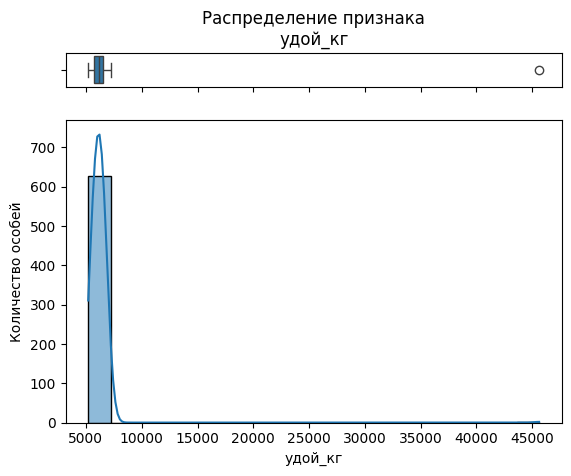

In [19]:
quant_feat_analysis(ferma_main, 'удой_кг')

Для данного признака (в будущем - целевой переменной) наблюдаем аномальные значения, почти в 10 раз превышающие среднее и медиану. Посмотрим отдельно на эти записи

In [20]:
ferma_main.query('удой_кг > 40000')

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
16  17    45616                                 11.5             1675   

    спо_сахаро_протеиновое_соотношение          порода тип_пастбища  \
16                                0.93  Вис Бик Айдиал    Холмистое   

   порода_папы_быка  жирность  белок  вкус_молока      возраст  
16          Айдиалл      3.22  3.076            1  более_2_лет

Всего одна аномальная запись (0.15% от общего числа). Значения во всех столбцах, кроме `удой_кг`, не являются аномалиями. Возможно, причина в том, что при записи данного значения удоя потеряна точка перед последней цифрой - значение **4561.6** гораздо больше похоже на реальное. В любом случае, ввиду того, что аномальное значение единственное, удалим эту запись и ещё раз посмотрим на статистику по данному столбцу. 

Также создадим список значений `outliers_id` с идентификаторами удалённых записей, по которым затем сможем удалить записи в датафрейме `ferma_dad`

Базовые статистики
count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64
-----------------------------------------------------


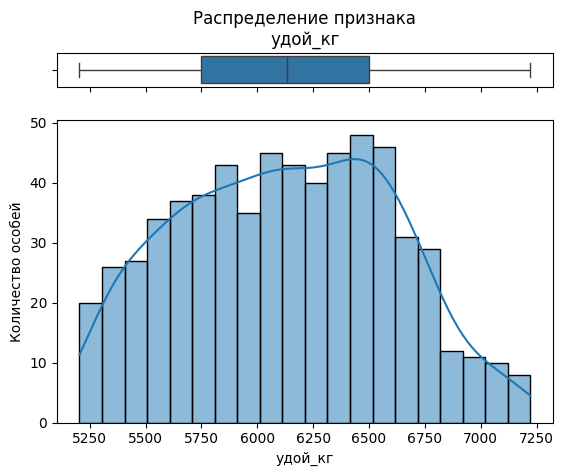

In [21]:
outliers_id = [17]
ferma_main.drop([16], inplace=True)
quant_feat_analysis(ferma_main, 'удой_кг')

После удаления выброса данные приобрели более корректный вид. Распределение признака напоминает нормальное, однако скошено влево - медиана чуть больше среднего значения, в левой области графика наблюдается большой "хвост". Полимодальность отсутствует. Судя по графику `boxplot`, выбросов нет

#### эке_энергетическая_кормовая_единица

Базовые статистики
count    628.000000
mean      14.548727
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.799999
Name: эке_энергетическая_кормовая_единица, dtype: float64
-----------------------------------------------------


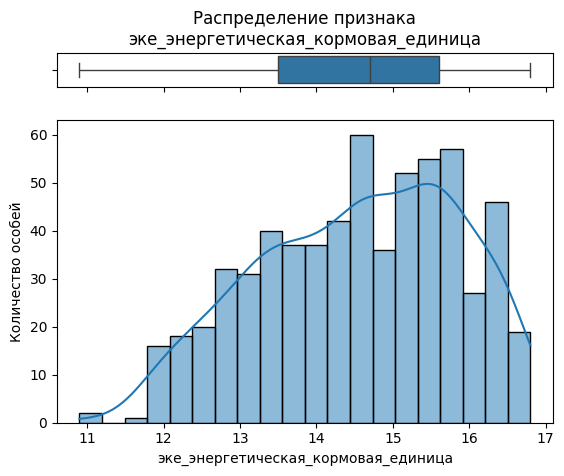

In [22]:
quant_feat_analysis(ferma_main, 'эке_энергетическая_кормовая_единица')

На графике явно выделяются значения около 11. Посмотрим на них отдельно

In [23]:
ferma_main.query('эке_энергетическая_кормовая_единица < 11.5')

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
456  457     5288                                 11.1             1925   
581  582     5573                                 10.9             1955   

     спо_сахаро_протеиновое_соотношение           порода тип_пастбища  \
456                                0.88  РефлешнСоверинг    Равнинное   
581                                0.84   Вис Бик Айдиал    Холмистое   

    порода_папы_быка  жирность  белок  вкус_молока      возраст  
456          Соверин      3.33  3.074            0  менее_2_лет  
581          Соверин      3.39  3.079            1  менее_2_лет

2 записи (0.3%) со значением признака меньше 11.2. При этом это не аномальные значения, они лежат в пределах левого "уса". Не будем удалять эти записи

Судя по гистограмме, распределение напоминает нормальное, скошено влево, полимодальность отсутствует. Выбросов (судя по `boxplot`) не наблюдается

#### сырой_протеин_г

Базовые статистики
count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин_г, dtype: float64
-----------------------------------------------------


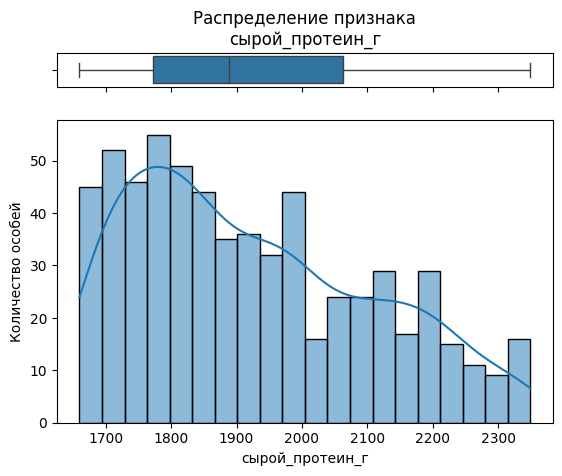

In [24]:
quant_feat_analysis(ferma_main, 'сырой_протеин_г')

Данные распределены сложным образом, можно предположить как скошенное вправо нормальное распределение (медиана значительно меньше, чем среднее), так и полимодальное распределение (с модами около 1750, 1950 и 2150). В идеальном случае (в будущем) хотелось бы увидеть от заказчика больше данных для более точного установления распределения данных (либо больше записей в первых 2 квартилях для нормализации распределения), чтобы получить лучшие результаты моделей МО

Судя по `boxplot`, выбросов в записях нет

#### спо_сахаро_протеиновое_соотношение

Базовые статистики
count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо_сахаро_протеиновое_соотношение, dtype: float64
-----------------------------------------------------


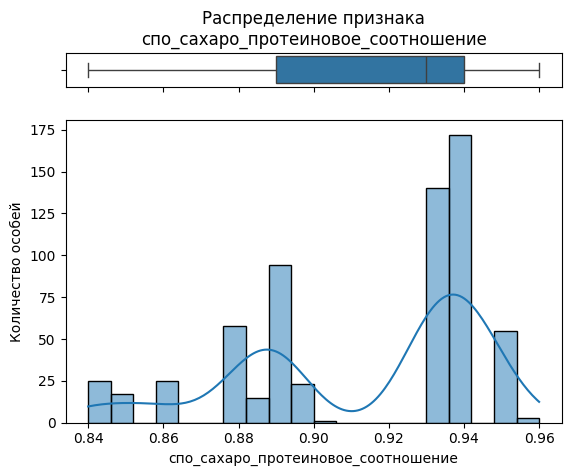

In [25]:
quant_feat_analysis(ferma_main, 'спо_сахаро_протеиновое_соотношение')

Явно можно увидеть полимодальное распределение признака. Можно предположить, что у этого признака есть корреляция с каким-то другим категориальным признаком. Посмотрим это на следующем шаге.

Судя по `boxplot`, выбросы отсутствуют

#### порода

Уникальные значения
Вис Бик Айдиал     0.592357
РефлешнСоверинг    0.407643
Name: порода, dtype: float64
-----------------------------------------------------
Базовые статистики
count                628
unique                 2
top       Вис Бик Айдиал
freq                 372
Name: порода, dtype: object
-----------------------------------------------------


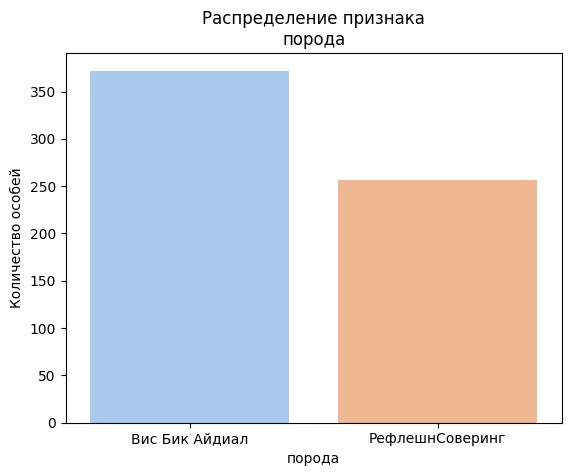

In [26]:
cat_feat_analysis(ferma_main, 'порода')

Категориальный признак имеет два значения, распределение особей по этим значениям близко к равномерному (хотя, в идеале, хотелось бы ещё более равномерного распределения)

#### тип_пастбища

Уникальные значения
Холмистое    0.557325
Равнинное    0.402866
Равнинные    0.039809
Name: тип_пастбища, dtype: float64
-----------------------------------------------------
Базовые статистики
count           628
unique            3
top       Холмистое
freq            350
Name: тип_пастбища, dtype: object
-----------------------------------------------------


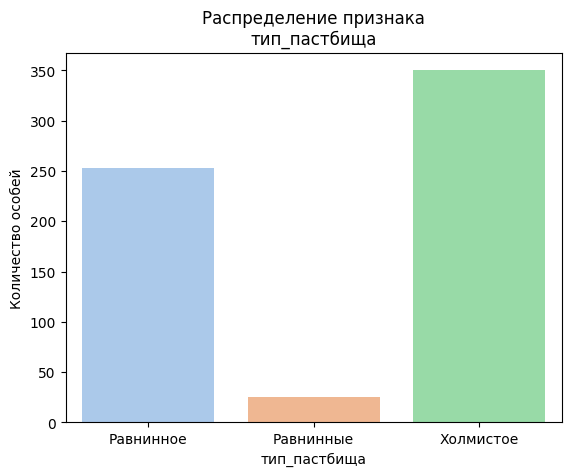

In [27]:
cat_feat_analysis(ferma_main, 'тип_пастбища')

3 значения категориального признака, из них выделяется значение `Равнинные`, которое можно заменить на гораздо более часто встречающееся `Равнинное`

Уникальные значения
Холмистое    0.557325
Равнинное    0.442675
Name: тип_пастбища, dtype: float64
-----------------------------------------------------
Базовые статистики
count           628
unique            2
top       Холмистое
freq            350
Name: тип_пастбища, dtype: object
-----------------------------------------------------


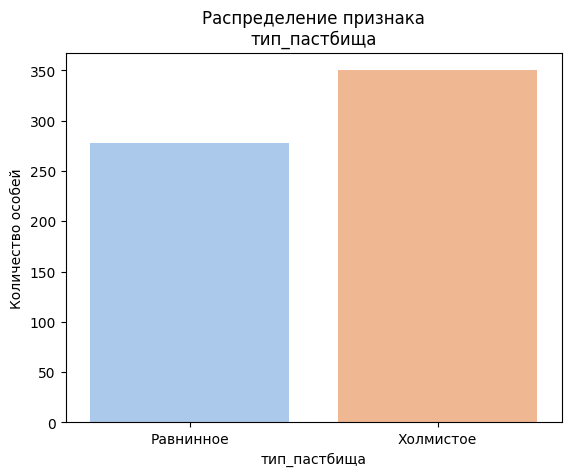

In [28]:
ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное', 
                             regex=True,
                             inplace=True)
cat_feat_analysis(ferma_main, 'тип_пастбища')

Замена проведена успешно. Для данного признака имеем 2 значения с близким к равномерому распределением

#### порода_папы_быка

Уникальные значения
Соверин    0.495223
Айдиал     0.382166
Айдиалл    0.122611
Name: порода_папы_быка, dtype: float64
-----------------------------------------------------
Базовые статистики
count         628
unique          3
top       Соверин
freq          311
Name: порода_папы_быка, dtype: object
-----------------------------------------------------


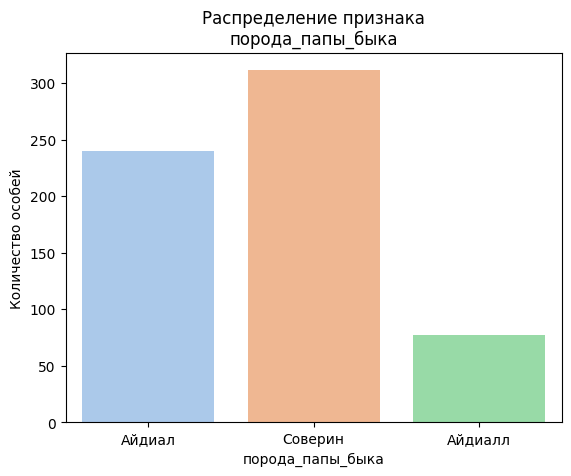

In [29]:
cat_feat_analysis(ferma_main, 'порода_папы_быка')

3 значения категориального признака, из них выделяется значение `Айдиал`, которое можно заменить на гораздо более часто встречающееся `Айдиал`

Уникальные значения
Айдиал     0.504777
Соверин    0.495223
Name: порода_папы_быка, dtype: float64
-----------------------------------------------------
Базовые статистики
count        628
unique         2
top       Айдиал
freq         317
Name: порода_папы_быка, dtype: object
-----------------------------------------------------


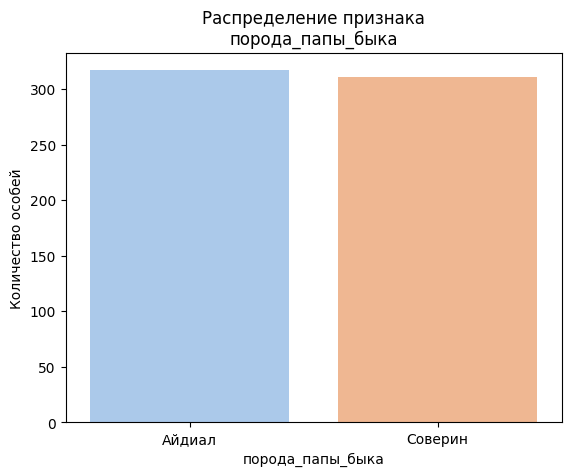

In [30]:
ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал', 
                             regex=True,
                             inplace=True)
cat_feat_analysis(ferma_main, 'порода_папы_быка')

#### жирность

Базовые статистики
count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64
-----------------------------------------------------


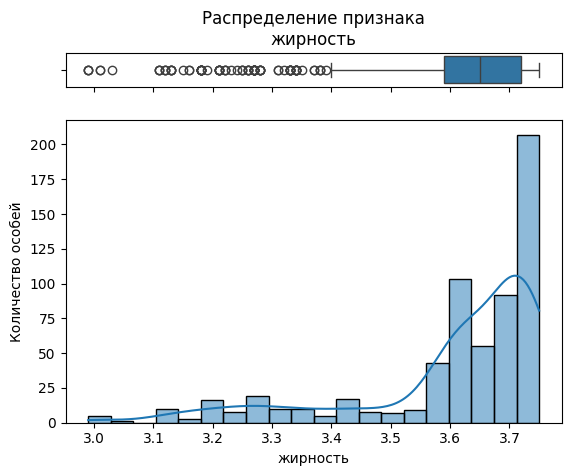

In [31]:
quant_feat_analysis(ferma_main, 'жирность')

По `boxplot` видно значительное количество выбросов в области малых значений признака. Посмотрим на них подробнее

In [32]:
ferma_main.query('жирность < 3.4').shape

(86, 12)

86 записей (13.7% от общего числа записей). Это большое количество, особенно ввиду небольшого суммарного числа записей. Не хотелось бы удалять такое количество записей

Данные в этом признаке распределены не нормально, наблюдается явное искажение в сторону бОльших значений признака. В будущем по возможности необходимо более корректно отобрать данные

#### белок

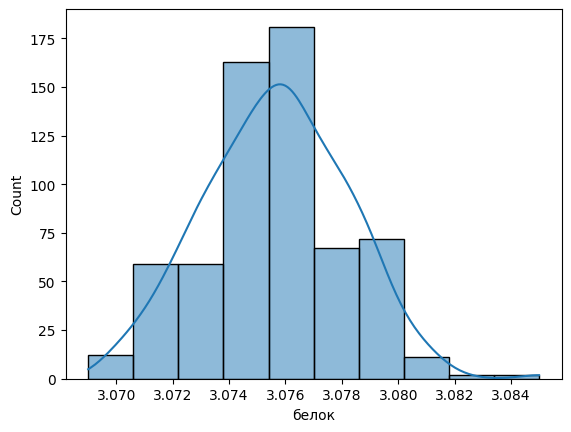

In [33]:
sns.histplot(data=ferma_main,
                 x='белок',
                 bins=round(1 + np.log2(628)),
                 kde=True);

Распределение признака очень похоже на нормальное. Краевые значения удалять не будем аналогично признаку `жирность`

#### вкус_молока

Уникальные значения
1    0.589172
0    0.410828
Name: вкус_молока, dtype: float64
-----------------------------------------------------
Базовые статистики
count    628.000000
mean       0.589172
std        0.492376
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: вкус_молока, dtype: float64
-----------------------------------------------------


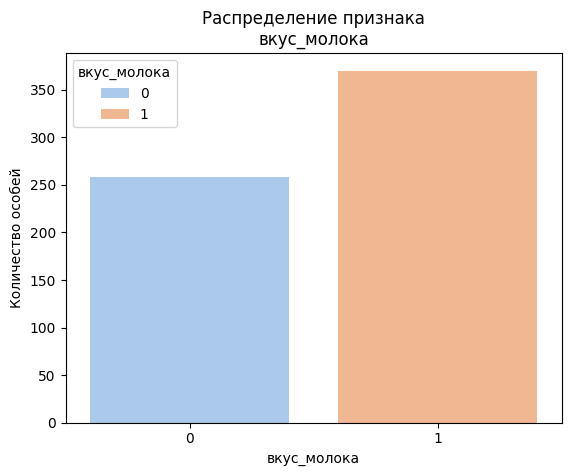

In [34]:
cat_feat_analysis(ferma_main, 'вкус_молока')

Таргет имеет два значения, которые распределены достаточно равномерно, но не идеально - есть некоторый дисбаланс классов

#### возраст

Уникальные значения
более_2_лет    0.824841
менее_2_лет    0.175159
Name: возраст, dtype: float64
-----------------------------------------------------
Базовые статистики
count             628
unique              2
top       более_2_лет
freq              518
Name: возраст, dtype: object
-----------------------------------------------------


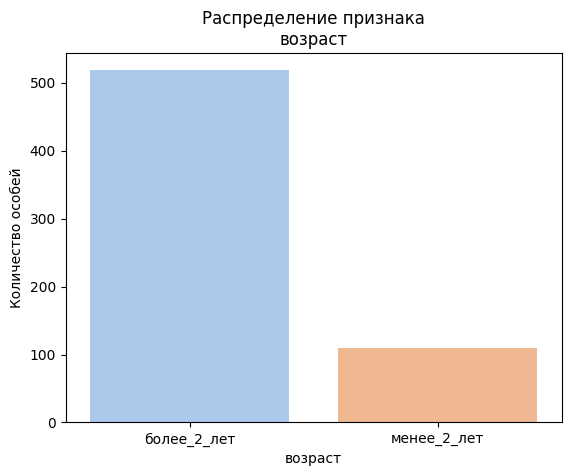

In [35]:
cat_feat_analysis(ferma_main, 'возраст')

Категориальный признак имеет 2 значения, при этом классы крайне разбалансированы. Имеет место не очень удачное разбиение данных на классы, поскольку корова обычно начинает давать молоко как раз в возрасте около 2 лет.

В будущем для более удачной работы моделей было бы лучше, на мой взгляд, либо пересмотреть разделение данных на классы по этому признаку в сторону увеличения порогового возраста, либо добрать в данные особей с возрастом менее 2 лет

In [36]:
#так как для некоторых кактегориальных признаков мы делали замены значений,
#нужно проверить, не образовались ли новые дубликаты в данных
ferma_main.duplicated().sum()

0

Новых явных дубликатов не появилось, можно переходить к новому датафрейму

### ferma_dad

#### id

Каждой особи присвоен уникальный `id`, как в прошлом датафрейме, статистический анализ проводить нет смысла

#### имя_папы

Уникальные значения
Барин       0.381558
Буйный      0.341812
Соловчик    0.174881
Геркулес    0.101749
Name: имя_папы, dtype: float64
-----------------------------------------------------
Базовые статистики
count       629
unique        4
top       Барин
freq        240
Name: имя_папы, dtype: object
-----------------------------------------------------


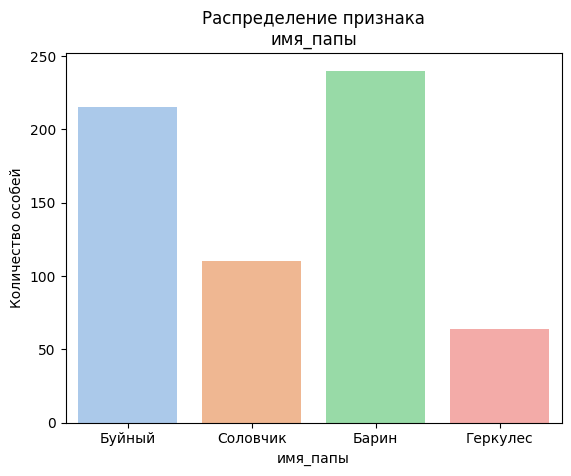

In [37]:
cat_feat_analysis(ferma_dad, 'имя_папы')

Категориальный признак имеет 4 значения, при этом 2 класса встречаются сильно чаще 2 остальных.

Проверим запись c тем `id`, который удалили в датафрейме `ferma_main`

In [38]:
ferma_dad.query('id in @outliers_id')

id имя_папы
16  17   Буйный

Удалим из датафрейма запись с `id` == 17, которую мы удалили в прошлом датафрейме, проверим корректность

Уникальные значения
Барин       0.382166
Буйный      0.340764
Соловчик    0.175159
Геркулес    0.101911
Name: имя_папы, dtype: float64
-----------------------------------------------------
Базовые статистики
count       628
unique        4
top       Барин
freq        240
Name: имя_папы, dtype: object
-----------------------------------------------------


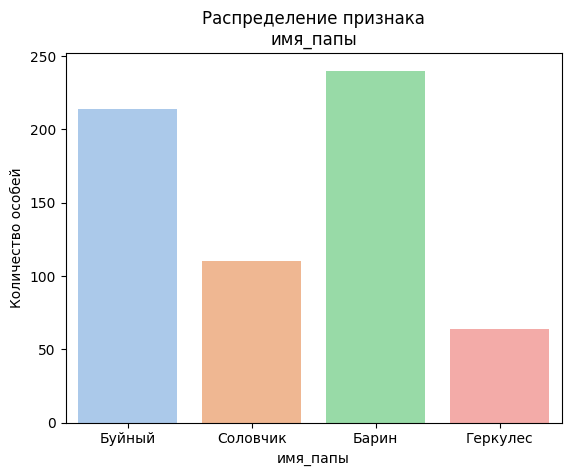

In [39]:
ferma_dad.query('id not in @outliers_id', inplace=True)
cat_feat_analysis(ferma_dad, 'имя_папы')

Удаление проведено успешно.

Данный признак содержит 4 класса, которые несбалансированы по размеру. В будущем стоит контролировать бОльшую равномерность классов

### cow_buy

Ввиду малого числа записей (всего 20), с осторожностью стоит относиться к разбросу в данных, аномальным значениям и выбросам

#### порода

Уникальные значения
РефлешнСоверинг    0.55
Вис Бик Айдиал     0.45
Name: порода, dtype: float64
-----------------------------------------------------
Базовые статистики
count                  20
unique                  2
top       РефлешнСоверинг
freq                   11
Name: порода, dtype: object
-----------------------------------------------------


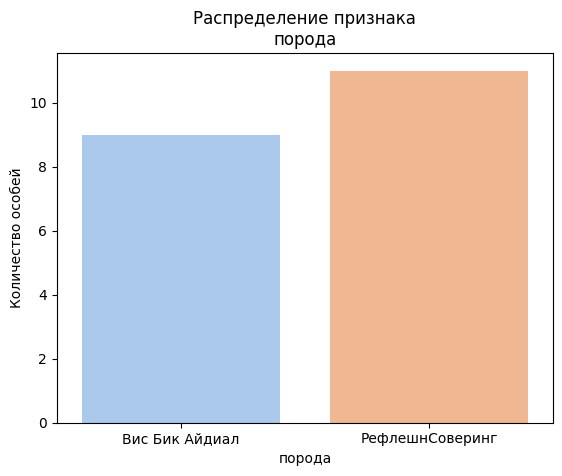

In [40]:
cat_feat_analysis(cow_buy, 'порода')

В категориальном признаке всего 2 класса, которые распределены практически равномерно. Однако, в отличие от того же признака в датафрейме `ferma_main`, здесь значений класса `РефлешнСоверинг` больше, чем `Вис Бик Айдиал`. Однако, стоит отметить, что здесь и далее при рассмотрении этого признака глобальные выводы делать нельзя (ввиду малого числа записей), а можно только посоветовать увеличить размеры тестовой выборки

#### тип_пастбища 

Уникальные значения
равнинное    0.55
холмистое    0.45
Name: тип_пастбища, dtype: float64
-----------------------------------------------------
Базовые статистики
count            20
unique            2
top       равнинное
freq             11
Name: тип_пастбища, dtype: object
-----------------------------------------------------


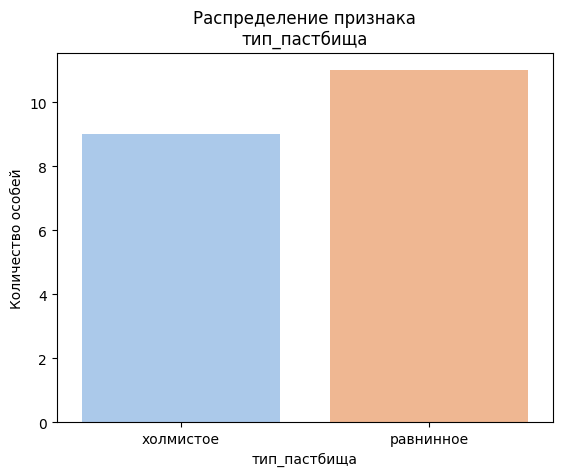

In [41]:
cat_feat_analysis(cow_buy, 'тип_пастбища')

Аналогичная ситуация, как и в предыдущем случае - в категориальном признаке всего 2 класса, которые распределены почти равномерно, но соотношение размеров классов изменилось на противоположное в сравнении с датфреймом `ferma_main`)

#### порода_папы_быка  

Уникальные значения
Соверин    0.6
Айдиал     0.4
Name: порода_папы_быка, dtype: float64
-----------------------------------------------------
Базовые статистики
count          20
unique          2
top       Соверин
freq           12
Name: порода_папы_быка, dtype: object
-----------------------------------------------------


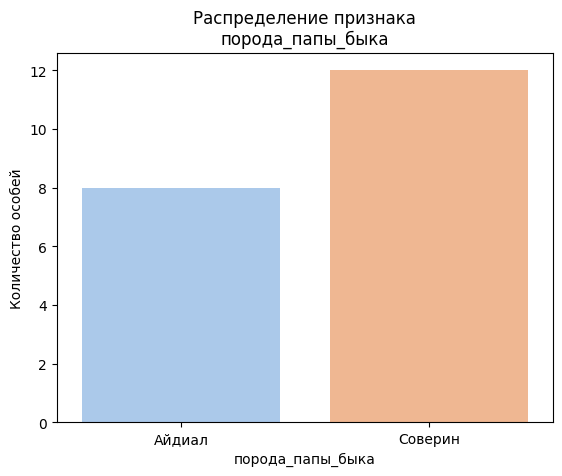

In [42]:
cat_feat_analysis(cow_buy, 'порода_папы_быка')

В категориальном признаке всего 2 класса. С одной стороны, записей одного класса  в 1.5 раза больше чем второго. С другой стороны, это вполне может быть вызвано малым размером выборки (разница всего в 4 особи). В последнем случае разница с распределением этого же признака в датафрейме `ferma_main` будет несущественна

#### имя_папы

Уникальные значения
Буйный      0.4
Геркулес    0.3
Барин       0.2
Соловчик    0.1
Name: имя_папы, dtype: float64
-----------------------------------------------------
Базовые статистики
count         20
unique         4
top       Буйный
freq           8
Name: имя_папы, dtype: object
-----------------------------------------------------


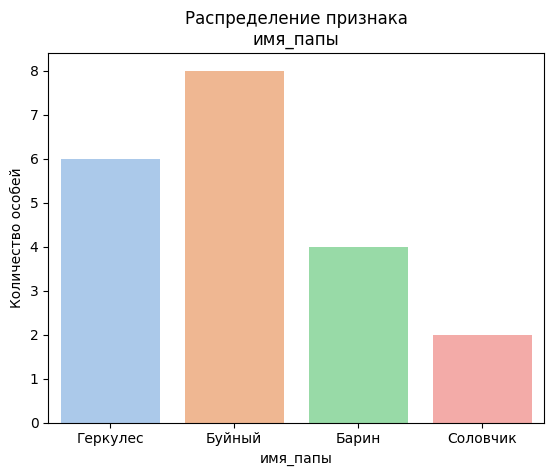

In [43]:
cat_feat_analysis(cow_buy, 'имя_папы')

Ситуация похожа на предыдущий признак - в категориальном признаке всего 4 класса, которые не распределены равномерно, но это вполне может быть вызвано малым размером выборки.

#### текущая_жирность

Базовые статистики
count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: текущая_жирность, dtype: float64
-----------------------------------------------------


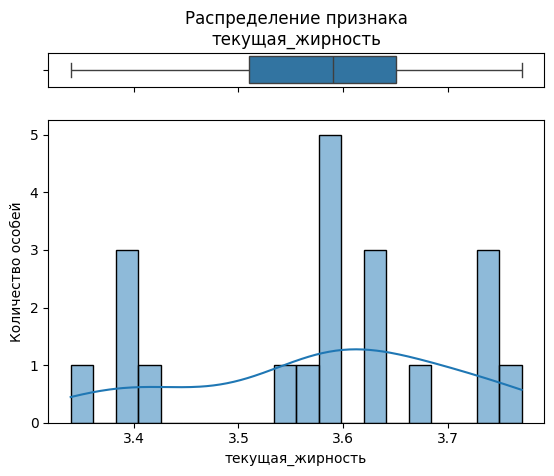

In [44]:
quant_feat_analysis(cow_buy, 'текущая_жирность')

По такой маленькой выборке, на мой взгляд, нельзя делать строгие выводы. Можно  сравнить значения стандартного отклонения, медианы и среднего в текущем датафрейме и `ferma_main`

| статистика    | ferma_main      | cow_buy       |  разница  
|:------------- |:---------------:| -------------:|-------------:
| std           | 0.168093        |     0.126818  |  0.041275
| mean          | 3.604268        |     3.577500  |  0.026768
| median        | 3.650000        |     3.590000  |  0.060000

Стандартное отклонение в текущем датафрейме даже меньше, а среднее и медиана занижены относительно такого же признака в `ferma_main`. Выбросов, судя по `boxplot`, не наблюдается

#### текущий_уровень_белок

Базовые статистики
count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок, dtype: float64
-----------------------------------------------------


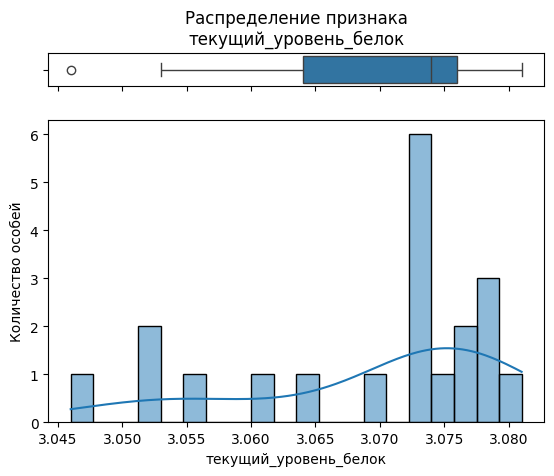

In [45]:
quant_feat_analysis(cow_buy, 'текущий_уровень_белок')

Ситуацяя аналогична предыдущему признаку. Сравним основные статистики

| статистика    | ferma_main      | cow_buy       |  разница  
|:------------- |:---------------:| -------------:|-------------:
| std           | 0.002551        |     0.010339  |  0.007788
| mean          | 3.075670        |     3.069500  |  0.000617
| median        | 3.076000        |     3.074000  |  0.002000

Для данного признака в текущем датафрейме стандартное отклонение в разы больше, чем в `ferma_main`, а среднее и медиана занижены. Судя по `boxplot`, присутствует один выброс, однако удалять его не будем (тестовая выборка)

#### возраст 

Уникальные значения
более_2_лет    0.75
менее_2_лет    0.25
Name: возраст, dtype: float64
-----------------------------------------------------
Базовые статистики
count              20
unique              2
top       более_2_лет
freq               15
Name: возраст, dtype: object
-----------------------------------------------------


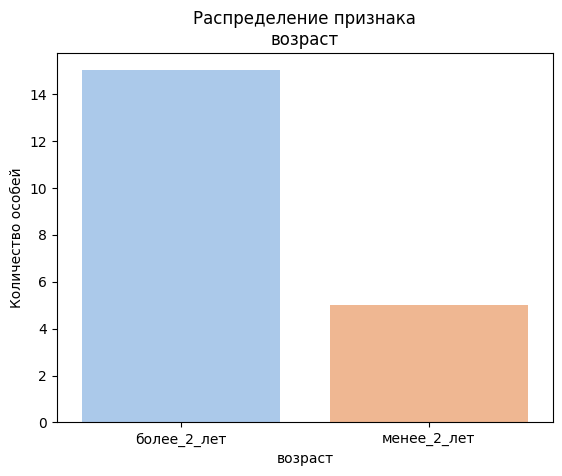

In [46]:
cat_feat_analysis(cow_buy, 'возраст')

Данный признак содержит 2 несбалансированных класса. Однако ранее в датафрейме `ferma_main` мы наблюдали аналогичную картину с ещё большим перекосом в сторону одного из классов. Это обусловлено выбранной границей разбиения классов.

Таким образом, был проведён исследовательский анализ признаков в трёх датафреймах. Были проанализированы количественные и категориальные признаки, обработаны аномальные значения, а также проведена коррекция данных там, где имели место неявные дубликаты в названиях групп категориальных признаков. Указаны рекомендации для улучшения сбора данных в будущем

## Корреляционный анализ

In [47]:
#создадим функцию для отрисовки диаграмм рассеяния
def scatterplots(quant_feature, title_name, graph_name):
    #quant_feature - количественный признак
    #title_name - имя признака для заголовка
    #graph_name - имя признака для графиков
    
    fig, axes = plt.subplots(5, 1, figsize = (6, 30))
    fig.suptitle(f'Диаграммы рассеяния для признаков Удой и {title_name}\n'
                 'с учётом категориальных признаков',
                 y=0.92)

    
    #категориальный признак - порода
    sns.scatterplot(data=ferma_main,
                    x=quant_feature,
                    y='удой_кг',
                    hue='порода',
                    style='порода',
                    legend='auto',
                    palette='pastel',
                    ax=axes[0])
    
    axes[0].set(title='Порода', 
                 xlabel=graph_name,
                 ylabel='Удой, кг')
    
    axes[0].legend(bbox_to_anchor=(1, 1))
   
    
    #категориальный признак - тип_пастбища
    sns.scatterplot(data=ferma_main,
                    x=quant_feature,
                    y='удой_кг',
                    hue='тип_пастбища',
                    style='тип_пастбища',
                    legend='auto',
                    palette='pastel',
                    ax=axes[1])
    
    axes[1].set(title='Тип пастбища', 
                 xlabel=graph_name,
                 ylabel='Удой, кг')
    axes[1].legend(bbox_to_anchor=(1, 1))
    
    
    #категориальный признак - порода_папы_быка
    sns.scatterplot(data=ferma_main,
                    x=quant_feature,
                    y='удой_кг',
                    hue='порода_папы_быка',
                    style='порода_папы_быка',
                    legend='auto',
                    palette='pastel',
                    ax=axes[2])
    
    axes[2].set(title='Порода папы быка', 
                 xlabel=graph_name,
                 ylabel='Удой, кг')
    axes[2].legend(bbox_to_anchor=(1, 1))
    
    
    #категориальный признак - вкус_молока
    sns.scatterplot(data=ferma_main,
                    x=quant_feature,
                    y='удой_кг',
                    hue='вкус_молока',
                    style='вкус_молока',
                    legend='auto',
                    palette='pastel',
                    ax=axes[3])
    
    axes[3].set(title='Вкус молока', 
                 xlabel=graph_name,
                 ylabel='Удой, кг')
    axes[3].legend(bbox_to_anchor=(1, 1))
    
    
    #категориальный признак - возраст
    sns.scatterplot(data=ferma_main,
                    x=quant_feature,
                    y='удой_кг',
                    hue='возраст',
                    style='возраст',
                    legend='auto',
                    palette='pastel',
                    ax=axes[4])
    
    axes[4].set(title='Возраст', 
                 xlabel=graph_name,
                 ylabel='Удой, кг')
    axes[4].legend(bbox_to_anchor=(1, 1))
    
    plt.show()

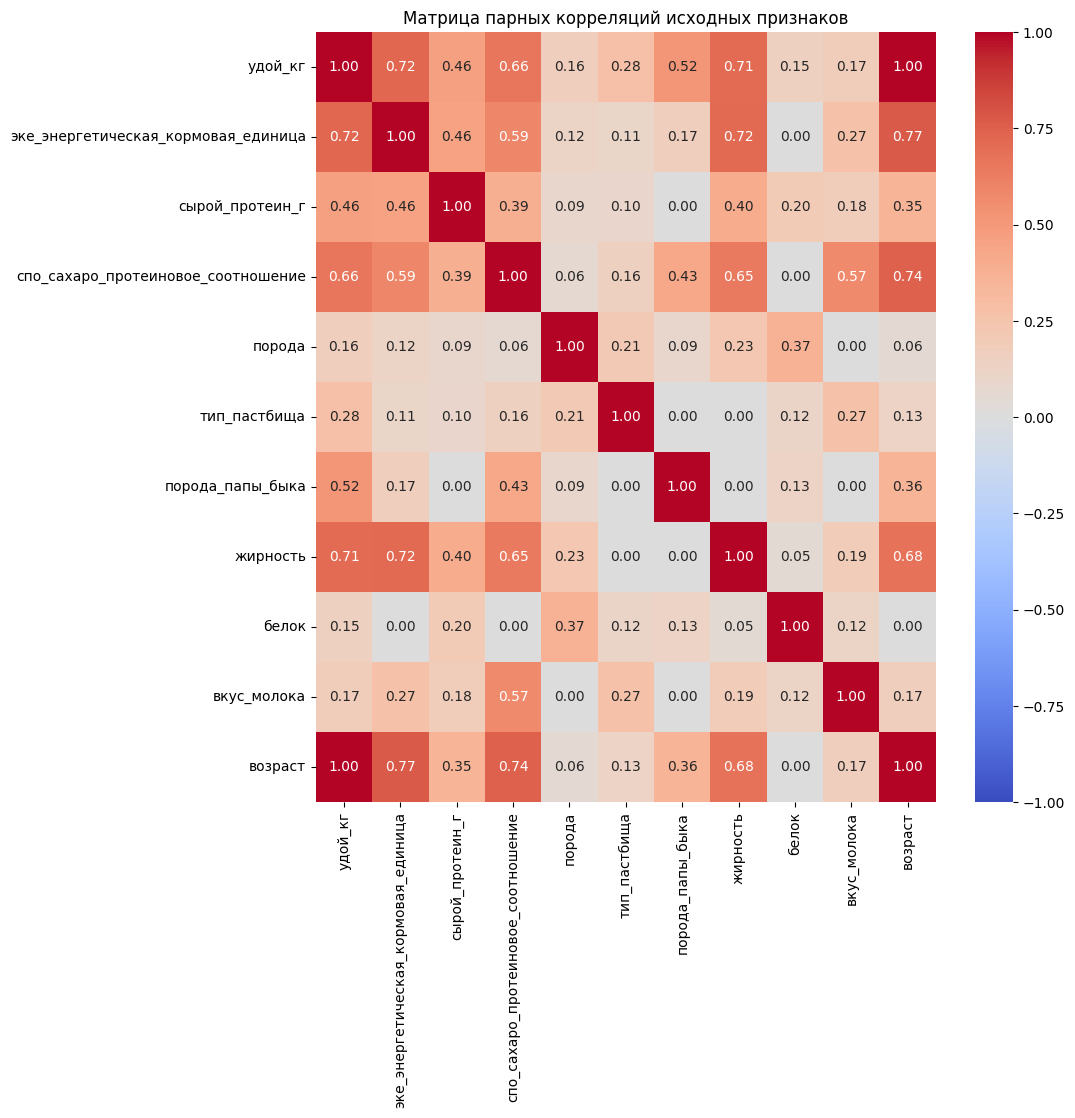

In [48]:
#выберем признаки с непрерывными значениями
#также создадим датафрейм corr_df, в который войдут все признаки исходного кроме id
interval_cols = (['удой_кг', 'эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 
                  'спо_сахаро_протеиновое_соотношение', 'жирность', 'белок'])
corr_df = ferma_main.loc[:, ferma_main.columns != 'id']

#рассчитаем коэффициенты корреляции между всеми признаками
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.phik_matrix(interval_cols=interval_cols),
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.2f').set(title='Матрица парных корреляций исходных признаков');

Судя по хитмапу корреляционной матрицы, можно отметить, что у целевого признака `удой_кг` имеется заметная или более сильная (коэффициент корреляции не меньше 0.5) связь с признаками:
*    `эке_энергетическая_кормовая_единица` - 0.72;
*    `спо_сахаро_протеиновое_соотношение` - 0.66;
*    `порода_папы_быка` - 0.52;
*    `жирность` - 0.71;
*    `возраст` - 1.00

Если говорить про входные признаки, то наибольший коэффициент корреляции (0.77) наблюдается между признаками `эке_энергетическая_кормовая_единица` и `возраст`, соответственно, можно сделать вывод, что между входными признаками мультиколлинеарности не наблюдается.

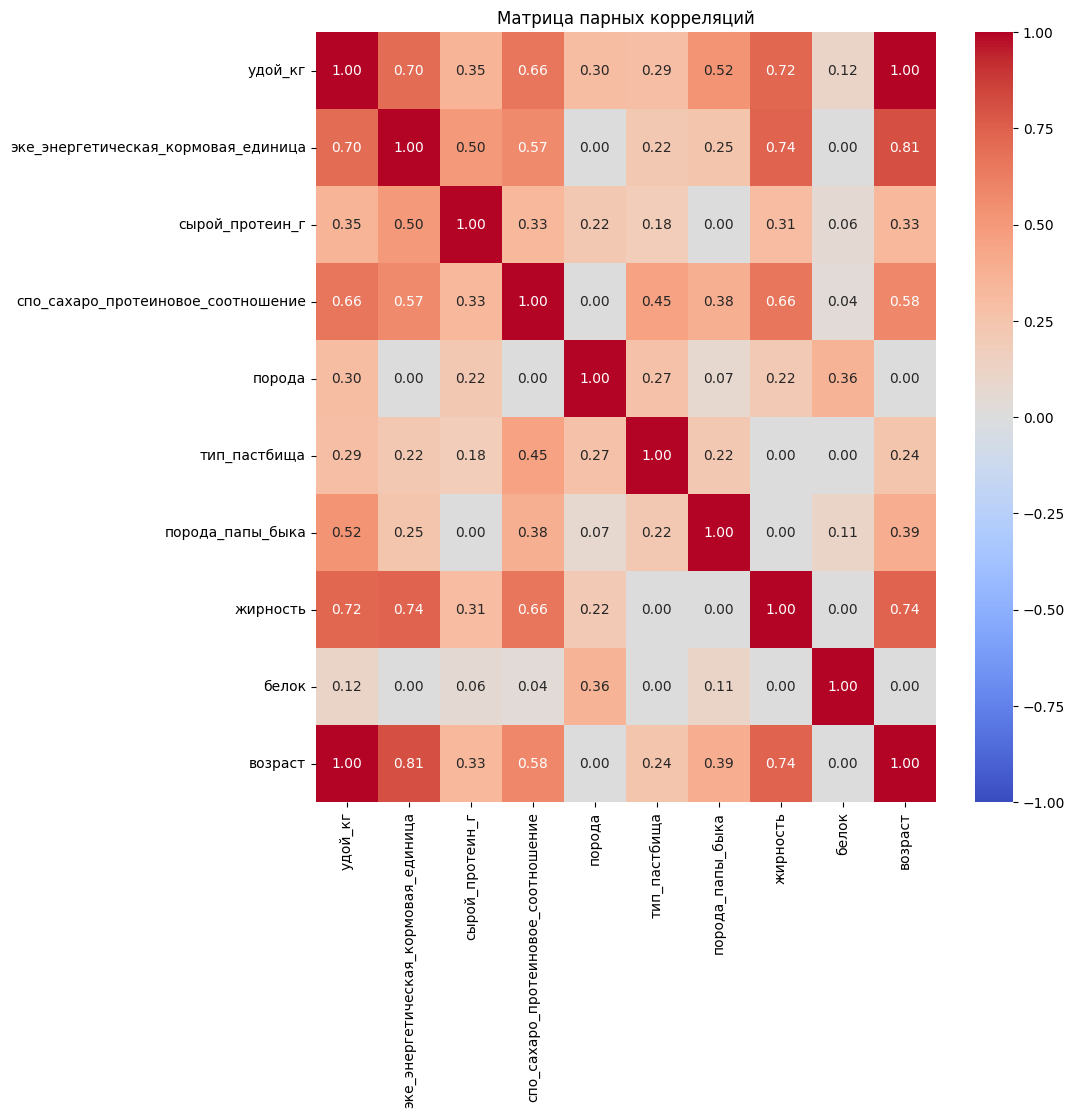

In [49]:
#рассчитаем коэффициенты корреляции между всеми признаками для коров с невкусным молоком
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.query('вкус_молока == 0')
                   .loc[:, corr_df.columns != 'вкус_молока']
                   .phik_matrix(interval_cols=interval_cols),
                                                           
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.2f').set(title='Матрица парных корреляций');

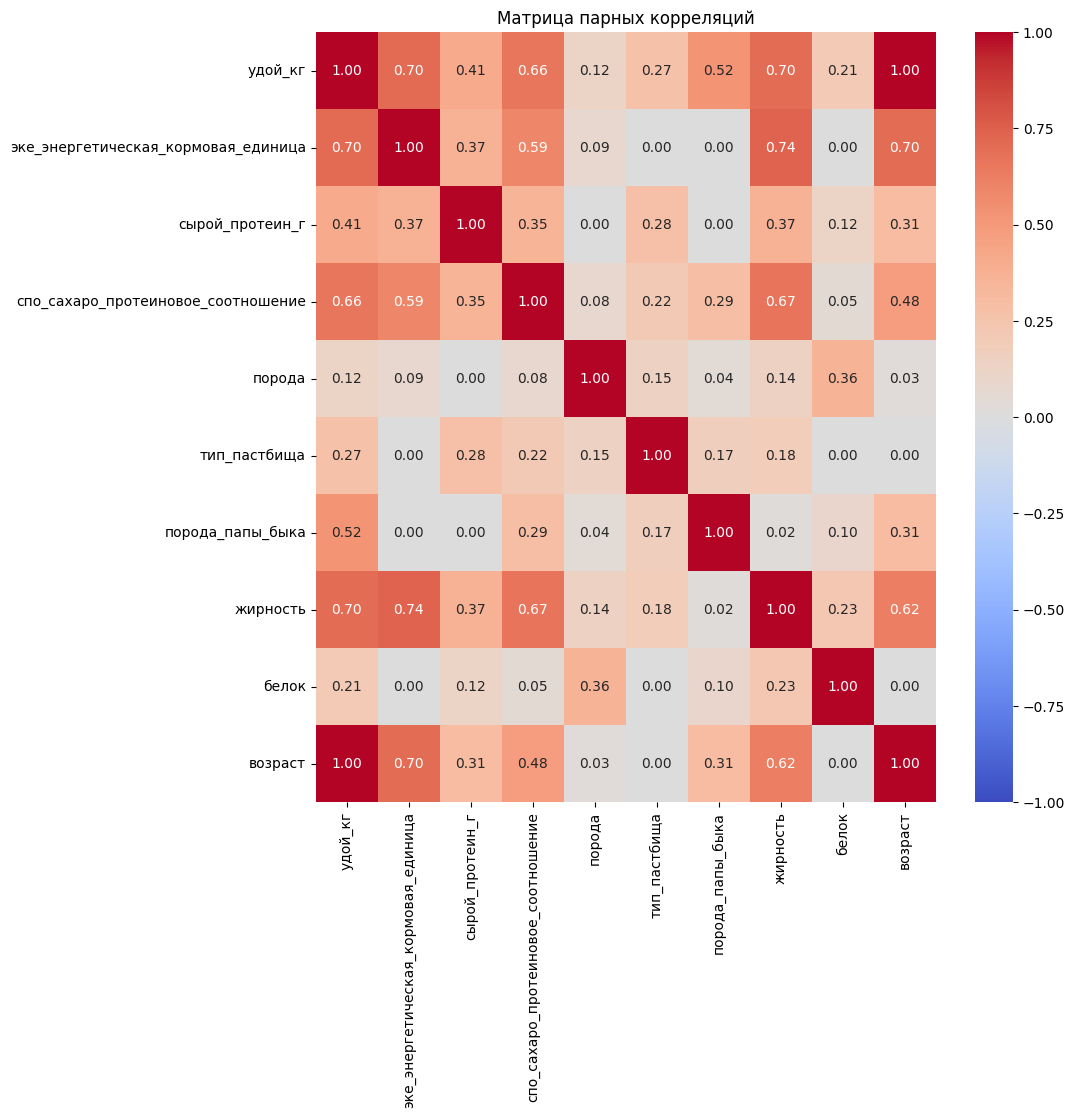

In [50]:
#рассчитаем коэффициенты корреляции между всеми признаками для коров с вкусным молоком
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.query('вкус_молока == 1')
                   .loc[:, corr_df.columns != 'вкус_молока']
                   .phik_matrix(interval_cols=interval_cols),
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.2f').set(title='Матрица парных корреляций');

Построим диаграммы рассеяния между целевым признаком и другими количественными признаками в зависимости от категориальных признаков

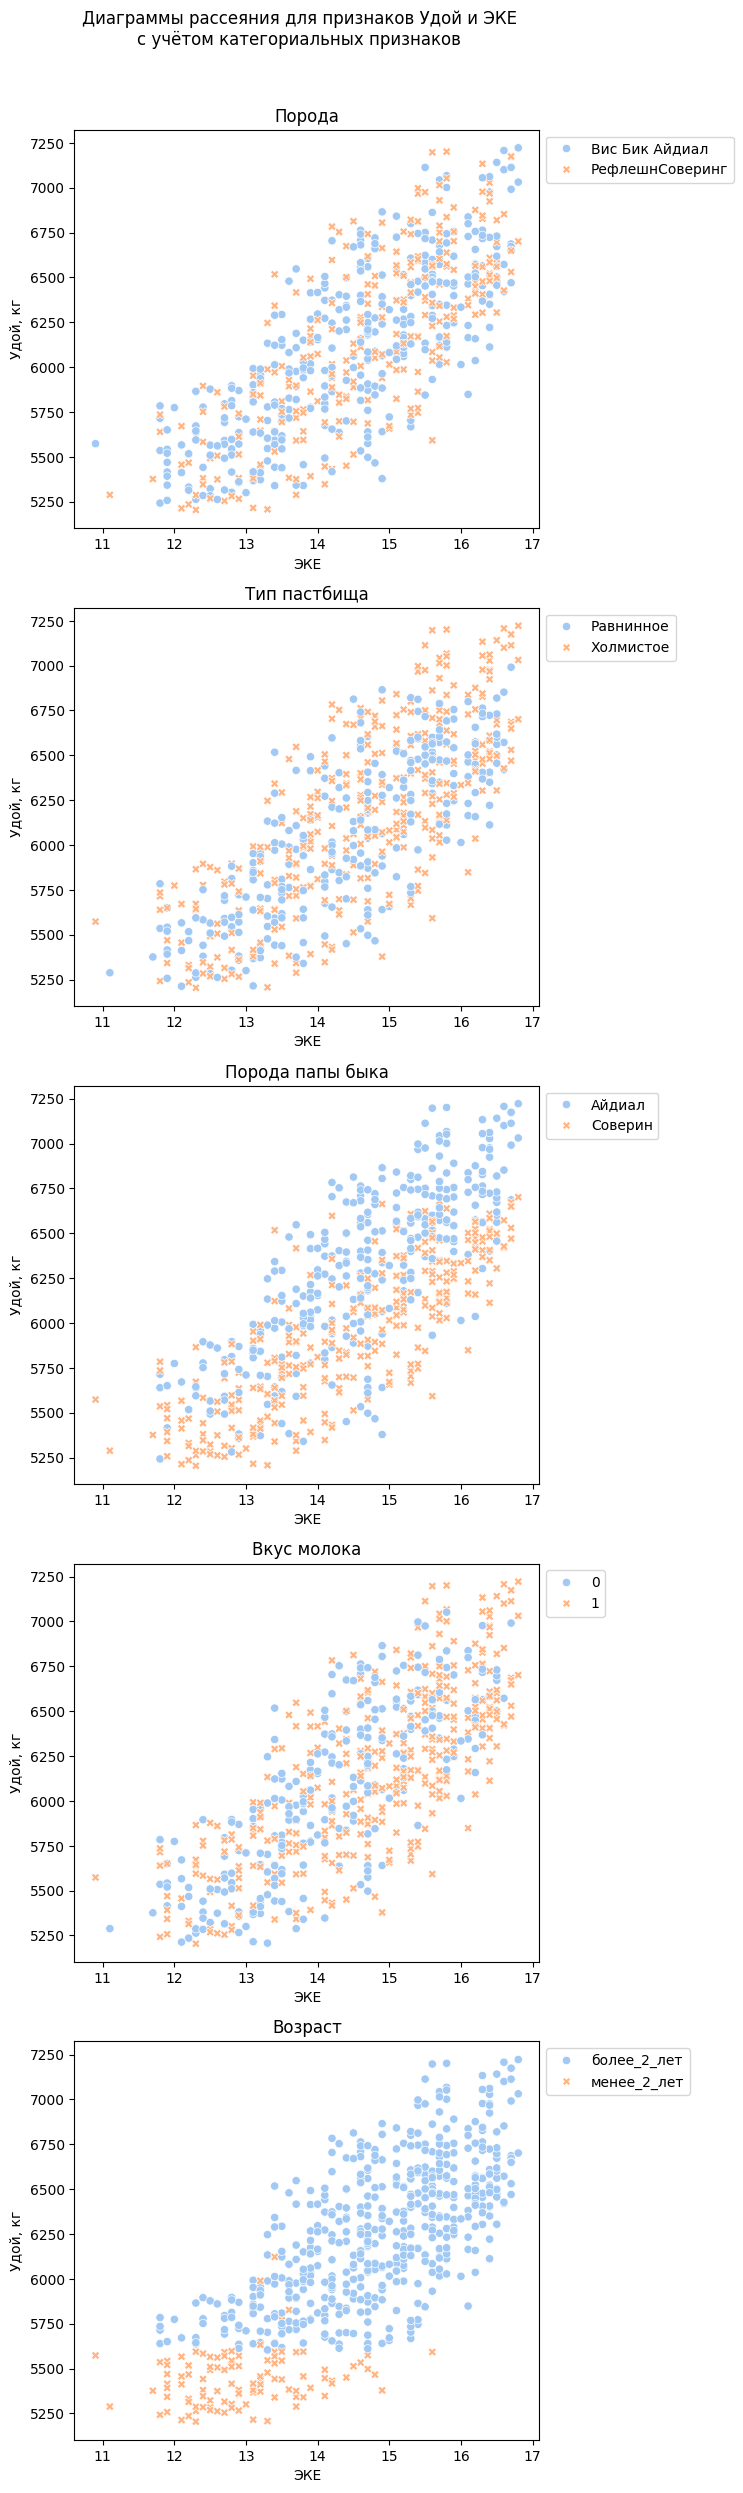

In [51]:
#количественный признак - эке_энергетическая_кормовая_единица
scatterplots(quant_feature='эке_энергетическая_кормовая_единица',
             title_name='ЭКЕ',
             graph_name='ЭКЕ')

Коэффициент корреляции между признаком `ЭКЕ` и целевым признаком - 0.72 (высокая линейная корреляция). Данный признак можно использовать для модели линейной регрессии

На диаграммах рассеяния видно, что в категориальных признаках `порода`, `тип пастбища` и `Вкус молока` значения распределены достаточно равномерно; при этом удой коров породы `Айдиал` в среднем выше, чем удой коров породы `Соверин`, а более возрастные коровы приносят молока гораздо больше, чем коровы, которым меньше 2 лет (по диаграммам рассеяния других категориальных признаков данные закономерности также прослеживаются).

Также заметно, что более возрастные коровы питаются кормом с более высоким ЭКЕ

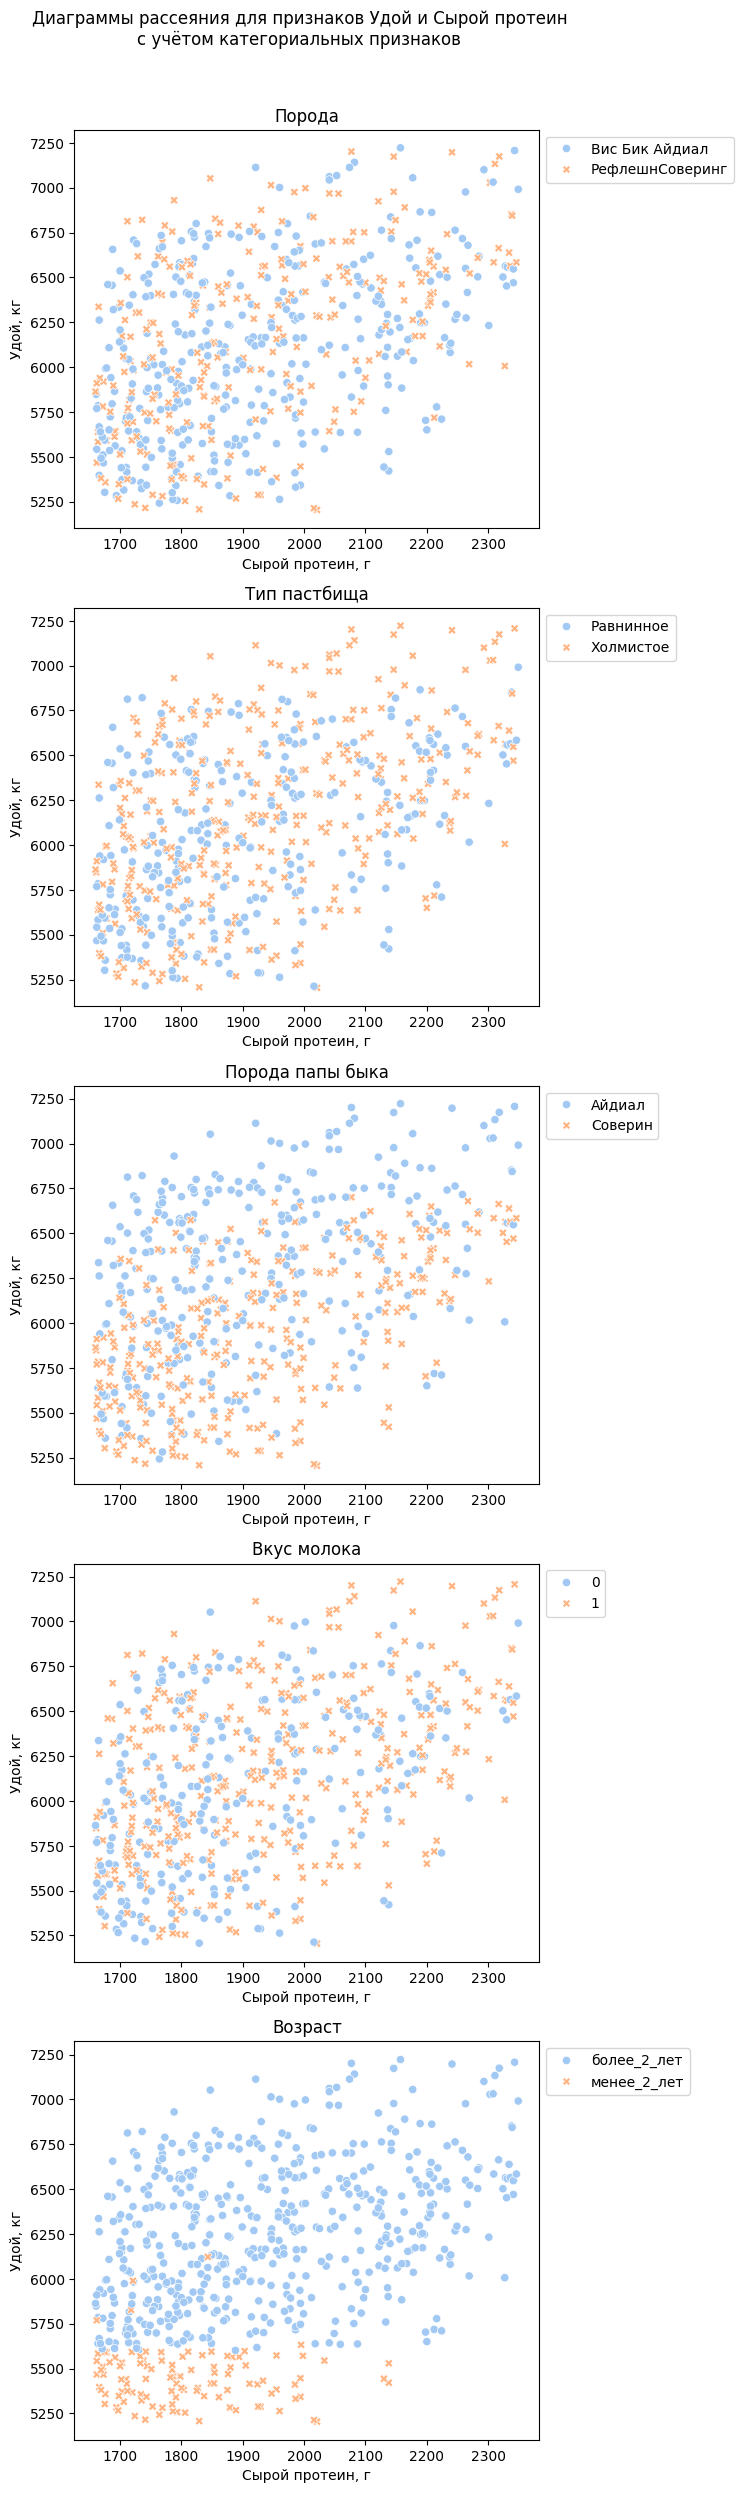

In [52]:
#количественный признак - сырой_протеин_г
scatterplots(quant_feature='сырой_протеин_г',
             title_name='Сырой протеин',
             graph_name='Сырой протеин, г')

Коэффициент корреляции между признаком `Сырой протеин` и целевым признаком - 0.46 (умеренная линейная корреляция). Не будем использовать данный признак для обучения модели линейной регрессии ввиду не очень высокого коэффициента корреляции и наличия нескольких признаков с более сильной связью

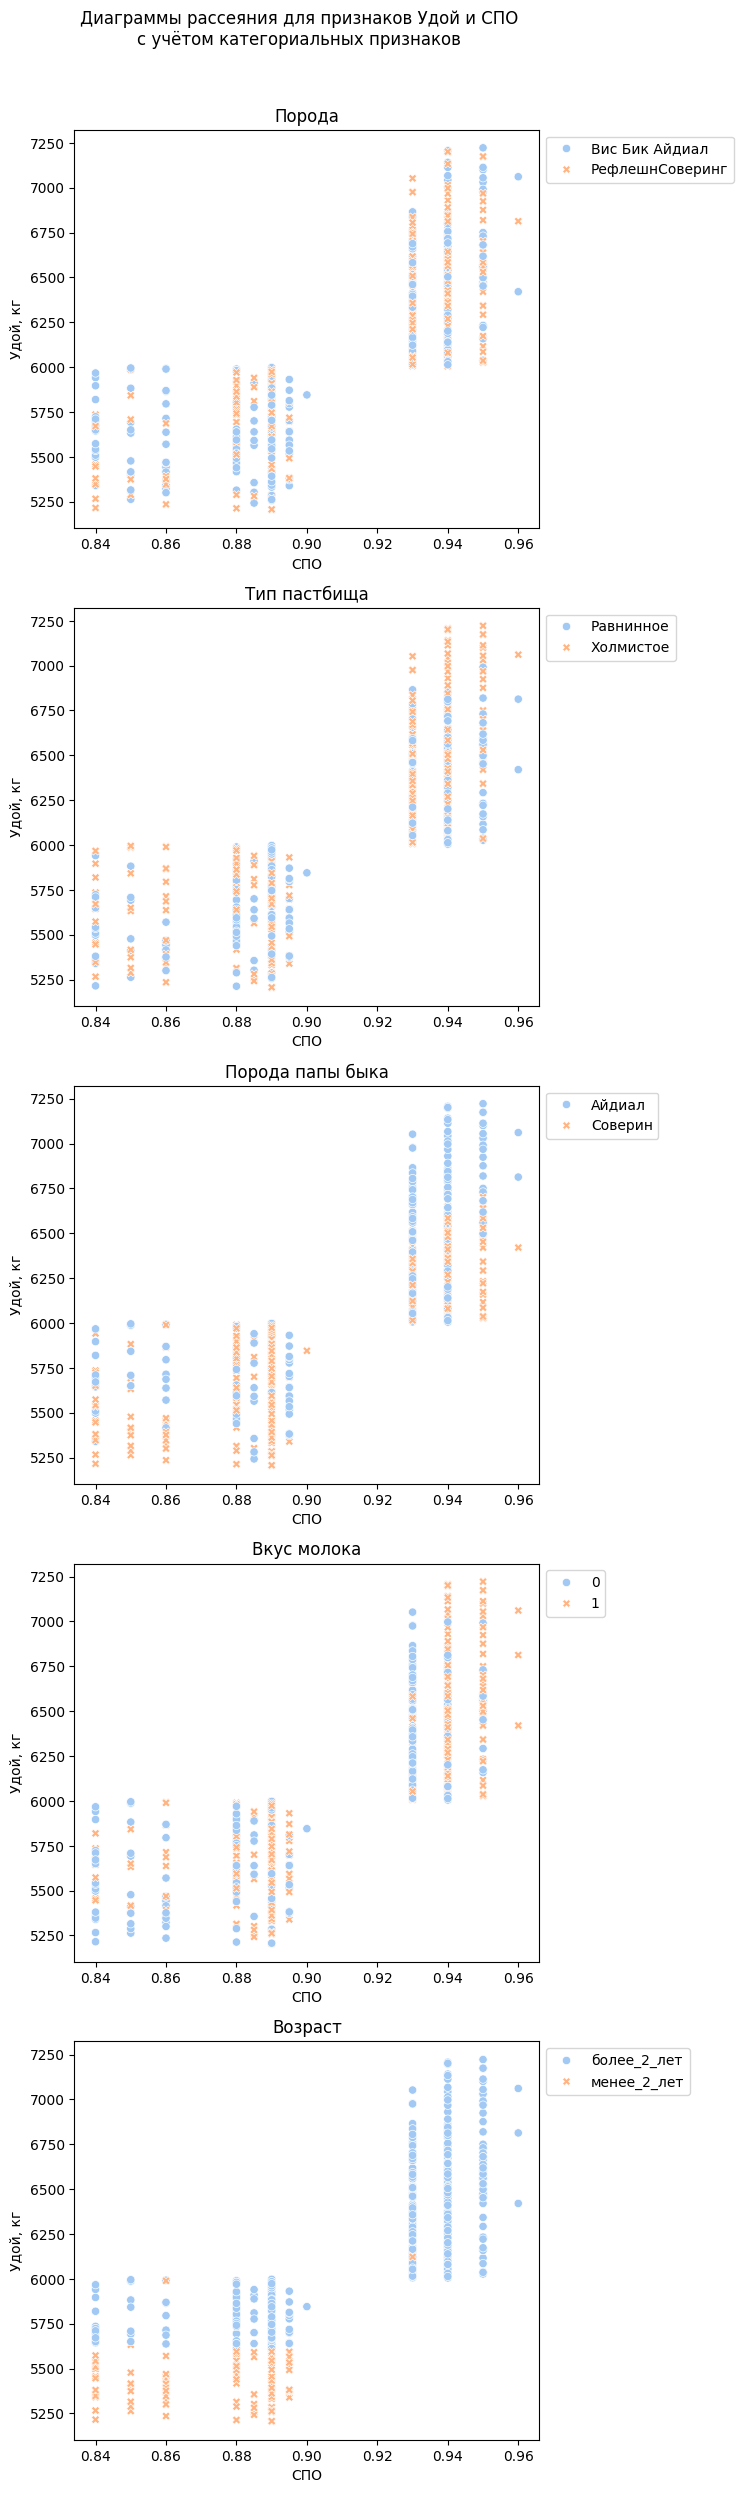

In [53]:
#количественный признак - спо_сахаро_протеиновое_соотношение
scatterplots(quant_feature='спо_сахаро_протеиновое_соотношение',
             title_name='СПО',
             graph_name='СПО')

Коэффициент корреляции между признаком `СПО` и целевым признаком - 0.66 (заметная линейная корреляция)

Однако из диаграмм рассеяния можно заметить, что для этого признака наблюдается нелинейная корреляции с целевым признаком - при значении `СПО` менее 0.91 величина удоя не превышает 6000 кг, а при значении `СПО` более 0.91 величина удоя не меньше 6000 кг. В дальнейшем имеет смысл создать дополнительные признаки из данного для улучшения качества модели

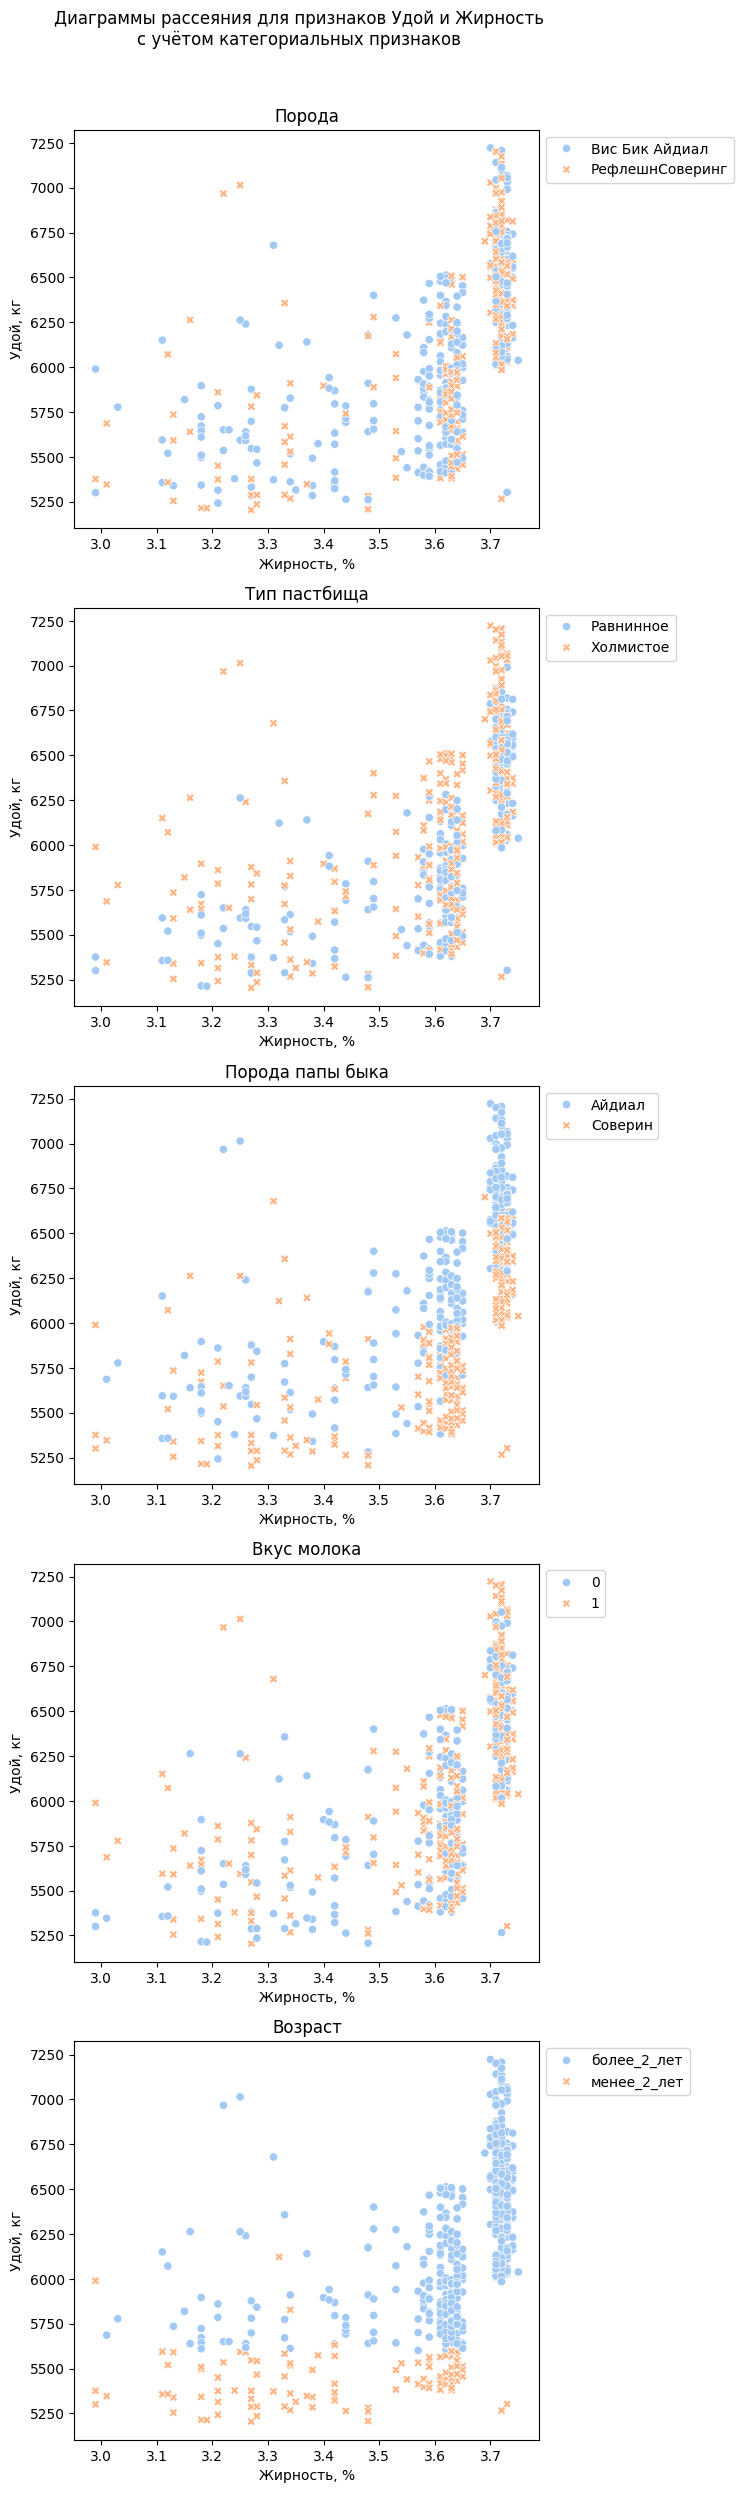

In [54]:
#количественный признак - жирность
scatterplots(quant_feature='жирность',
             title_name='Жирность',
             graph_name='Жирность, %')

Коэффициент корреляции между признаком `Жирность` и целевым признаком - 0.71 (высокая линейная корреляция). Однако, на мой взгляд, данный признак нельзя использовать для модели линейной регрессии, поскольку и входной, и целевой признак являются характеристиками молока. Кроме того, логично предположить, что жирность молока напрямую будет зависеть от характеристик корма коровы.

Также можно отметить, что присутствует нелинейная связь между жирностью молока и удоем - удой коров, дающих молоко с жирностью около 3.6%, находится в диапазоне от 5250 до 6500 кг, тогда как удой коров, дающих молоко с жирностью около 3.7%, от 6000 до 7250 кг



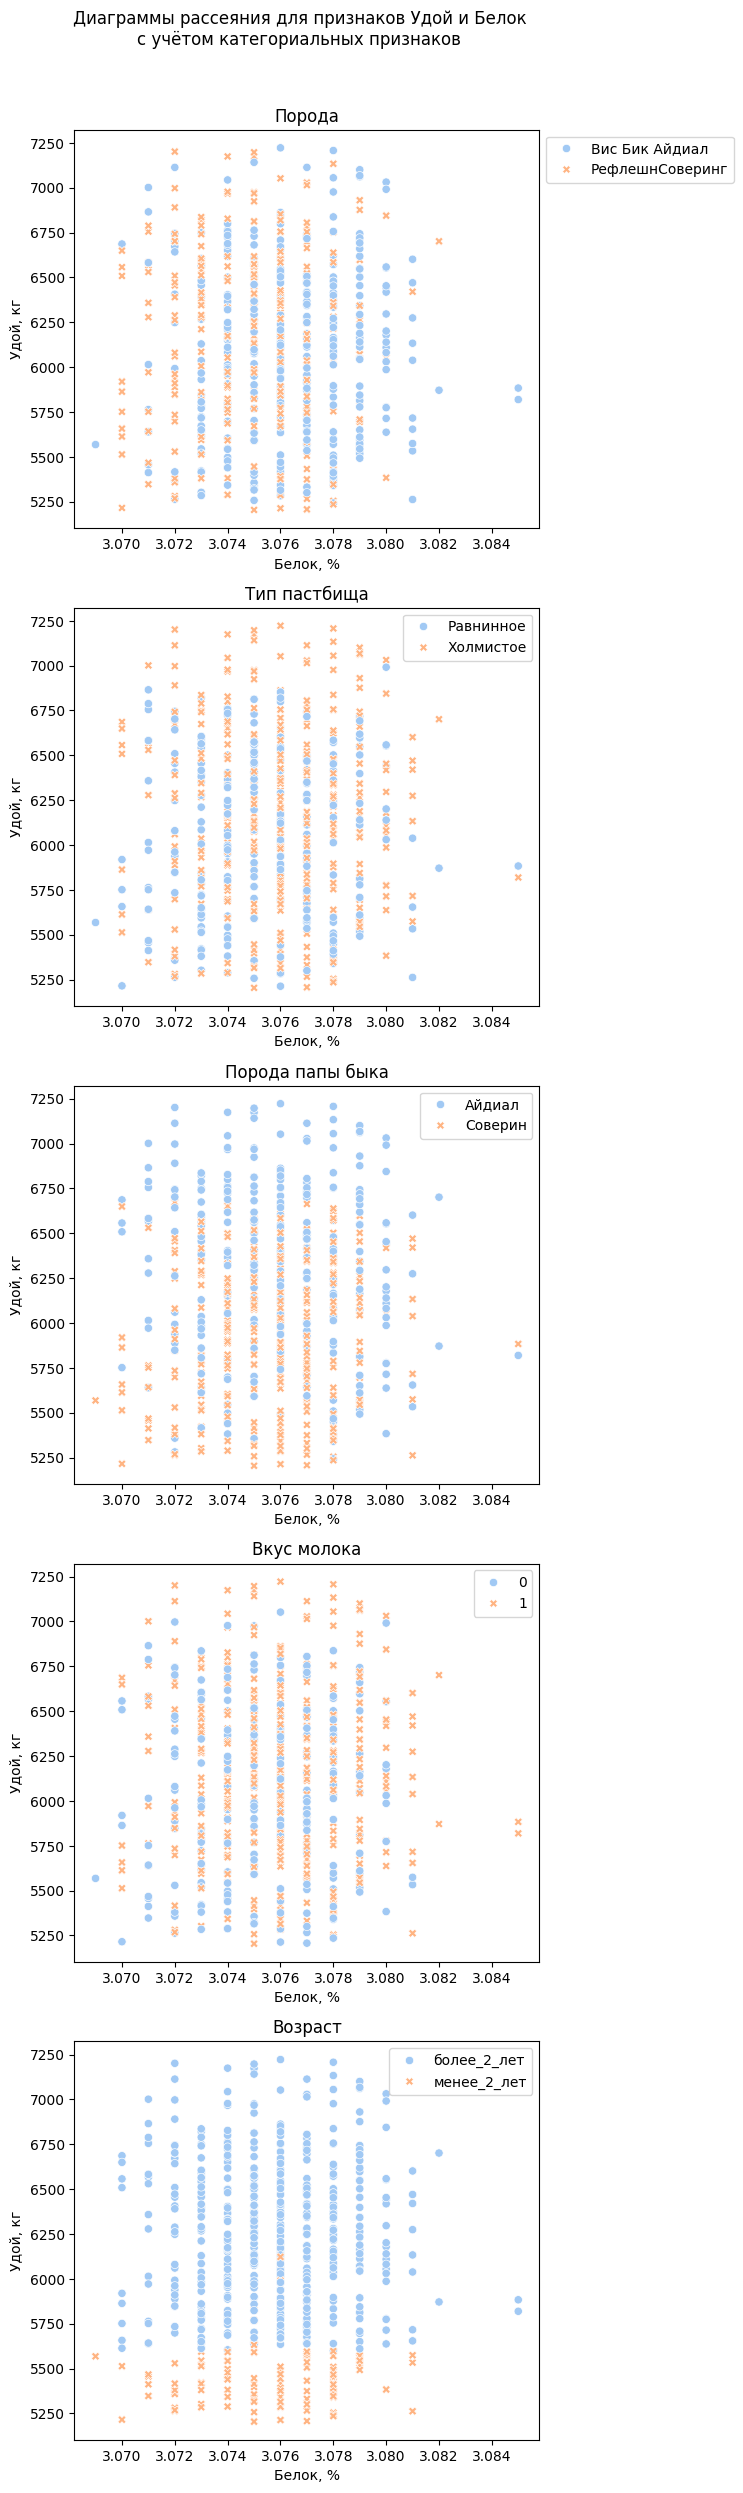

In [55]:
#количественный признак - белок
scatterplots(quant_feature='белок',
             title_name='Белок',
             graph_name='Белок, %')

Коэффициент корреляции между признаком `Белок` и целевым признаком - 0.23 (слабая линейная корреляция). Данный признак (также, как и жирность) нельзя использовать для модели линейной регрессии, поскольку и входной, и целевой признак являются характеристиками молока. 

Таким образом, были посчитаны и изучены корреляции между всеми признаками. Отобраны потенциально подходящие для модели линейной регрессии признаки, установлено отсутствие мультиколлинеарности между входными признаками.

Также с помощью диаграмм рассеяния между целевым признаком и количественными признаками с учетом категориальных признаков были установлены виды связей между целевым и входными признаками, в том числе нелинейная связь между `СПО` и целевым признаком

## Обучение модели линейной регрессии

### Модель 1

In [56]:
#функция для подсчёта метрик и анализа остатков
def linreg_analysis(y_test, predictions, residuals, number):
    #y_test - точные значения удоя
    #predictions - предсказания модели
    #residuals - остатки
    #number - номер модели
    
    
    #строим графики для анализа осттатков
    fig, axes = plt.subplots(1, 2, figsize = (15, 10))
    fig.suptitle(f'Анализ остатков модели {number}')
    
    sns.histplot(x=residuals,
                 bins=20,
                 ax=axes[0])
    
    axes[0].set(title='Гистограмма распределения остатков', 
                xlabel='Остатки',
                ylabel='Количество остатков')
    
    sns.scatterplot(x=predictions,
                    y=residuals,
                    ax=axes[1])
    
    axes[1].set(title='Анализ дисперсии', 
                xlabel='Предсказания модели',
                ylabel='Остатки')
    
    #создаём датафрейм с основными метриками
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    data = {
        'MAE': [round(mae, 2)],
        'MSE': [round(mse, 2)],
        'RMSE': [round(rmse, 2)],
        'R^2': [round(r2, 4)]
    }
    metrics = pd.DataFrame(data=data)
    return metrics

Для первой модели линейной регрессии выберем признаки `порода_папы_быка`,  `возраст`, `эке_энергетическая_кормовая_единица` и `спо_сахаро_протеиновое_соотношение` как имеющие наибольшие коэффициенты корреляции с целевым признаком

Тренировочная выборка: число строк - 471, число столбцов - 4 
Тестовая выборка: число строк - 157, число столбцов - 4


MAE       MSE    RMSE     R^2
0  171.13  45491.28  213.29  0.7765

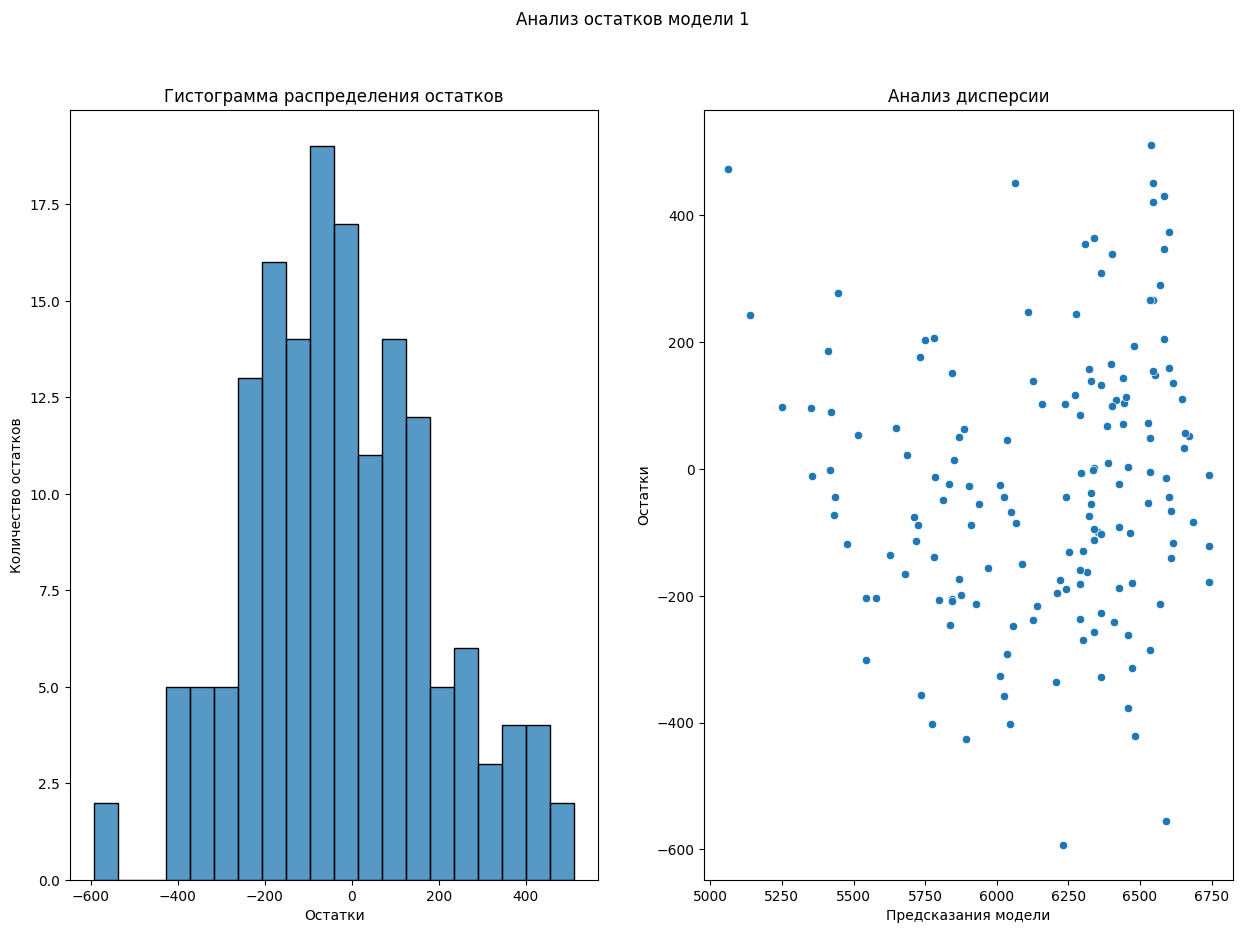

In [57]:
#отбор подходящих признаков, выделение целевого признака
X = ferma_main.drop(['id', 'удой_кг', 'сырой_протеин_г', 'порода', 'тип_пастбища', 'жирность', 'белок', 'вкус_молока'],
                     axis=1)
y = ferma_main['удой_кг']

#разделение данных на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

#проверка корректности разбиения выборок
print(f'Тренировочная выборка: число строк - {X_train.shape[0]}, число столбцов - {X_train.shape[1]} \n'
      f'Тестовая выборка: число строк - {X_test.shape[0]}, число столбцов - {X_test.shape[1]}')

#выделение категориальных и количественных признаков
cat_cols = ['порода_папы_быка', 'возраст']
quant_cols =['эке_энергетическая_кормовая_единица', 'спо_сахаро_протеиновое_соотношение']


#подготовка данных
encoder_1 = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder_1.fit_transform(X_train[cat_cols])
X_test_ohe = encoder_1.transform(X_test[cat_cols])
encoder_col_names = encoder_1.get_feature_names_out()

scaler_1 = StandardScaler()
X_train_scaled = scaler_1.fit_transform(X_train[quant_cols])
X_test_scaled = scaler_1.transform(X_test[quant_cols])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=quant_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quant_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучение модели
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions_1 = model_lr_1.predict(X_test)
residuals_1 = y_test - predictions_1

#вызов функции для получения метрик и анализа остатков
linreg_analysis(y_test, predictions_1, residuals_1, '1')

R<sup>2</sup> первой модели - 0.7765. MAE меньше MSE на 42 кг (что логично, мы помним, что в данных у нас присутствовали выбросы, к которым MAE более устойчива)

Распределение остатков колоколообразное, однако среднее значение остатков смещено влево от нуля. Модель даёт слишком большие предсказания, что потенциально может стать большой проблемой в будущем - купленные фермером коровы дадут меньше молока, чем он будет рассчитывать. Кроме того, на гистограмме видны выбросы в области от -550 до -600.

Анализ остатков показывает, что дисперсия остатков в области до 6000 меньше, чем в области после 6000

Всё вышеперечисленное говорит о том, что модель ведёт себя не очень стабильно, нужны дополнительные исследования



### Модель 2

Создадим 2 дополнительных признака: бинарный признак `спо_бин` на основе границы, которую определили на предыдущем этапе; а также `эке_в_квадрате`, соответствующий квадрату значения из столбца `эке_энергетическая_кормовая_единица`

In [58]:
#создадим новые признаки, проверим корректность добавления
ferma_main['спо_бин'] = ferma_main['спо_сахаро_протеиновое_соотношение'].map(lambda x:
                                                                             'высокое СПО' if x > 0.91 else 'низкое СПО')
ferma_main['эке_в_квадрате'] = ferma_main['эке_энергетическая_кормовая_единица'].map(lambda x:
                                                                                     x**2)
ferma_main.head(10)

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   
5   6     5254                                 12.7             1806   
6   7     5910                                 13.2             1792   
7   8     6179                                 14.7             1806   
8   9     6783                                 14.2             1918   
9  10     5339                                 13.4             1791   

   спо_сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                               0.890   Вис Бик Айдиал    Равнинное   
1                               0.890   Вис Бик Айдиал    Равнинное   
2                               0.885  РефлешнСоверинг    Холмистое   
3                               0.885  РефлешнСоверинг    Холмистое   
4                               0.885   Вис Бик Айдиал    Равнинное   
5                               0.885  РефлешнСоверинг    Холмистое   
6                               0.885   Вис Бик Айдиал    Равнинное   
7                               0.930   Вис Бик Айдиал    Равнинное   
8                               0.940  РефлешнСоверинг    Холмистое   
9                               0.895   Вис Бик Айдиал    Холмистое   

  порода_папы_быка  жирность  белок  вкус_молока      возраст      спо_бин  \
0           Айдиал      3.58  3.076            1  более_2_лет   низкое СПО   
1          Соверин      3.54  3.079            1  менее_2_лет   низкое СПО   
2          Соверин      3.59  3.074            0  более_2_лет   низкое СПО   
3           Айдиал      3.40  3.075            0  более_2_лет   низкое СПО   
4          Соверин      3.73  3.073            1  менее_2_лет   низкое СПО   
5          Соверин      3.13  3.078            1  менее_2_лет   низкое СПО   
6          Соверин      3.48  3.077            1  более_2_лет   низкое СПО   
7           Айдиал      3.55  3.076            1  более_2_лет  высокое СПО   
8           Айдиал      3.71  3.077            1  более_2_лет  высокое СПО   
9          Соверин      3.13  3.075            1  менее_2_лет   низкое СПО   

   эке_в_квадрате  
0      201.639995  
1      163.840005  
2      196.000000  
3      153.759991  
4      163.840005  
5      161.289995  
6      174.239995  
7      216.089994  
8      201.639995  
9      179.559990

Посмотрим на матрицу корреляции с учётом новых признаков

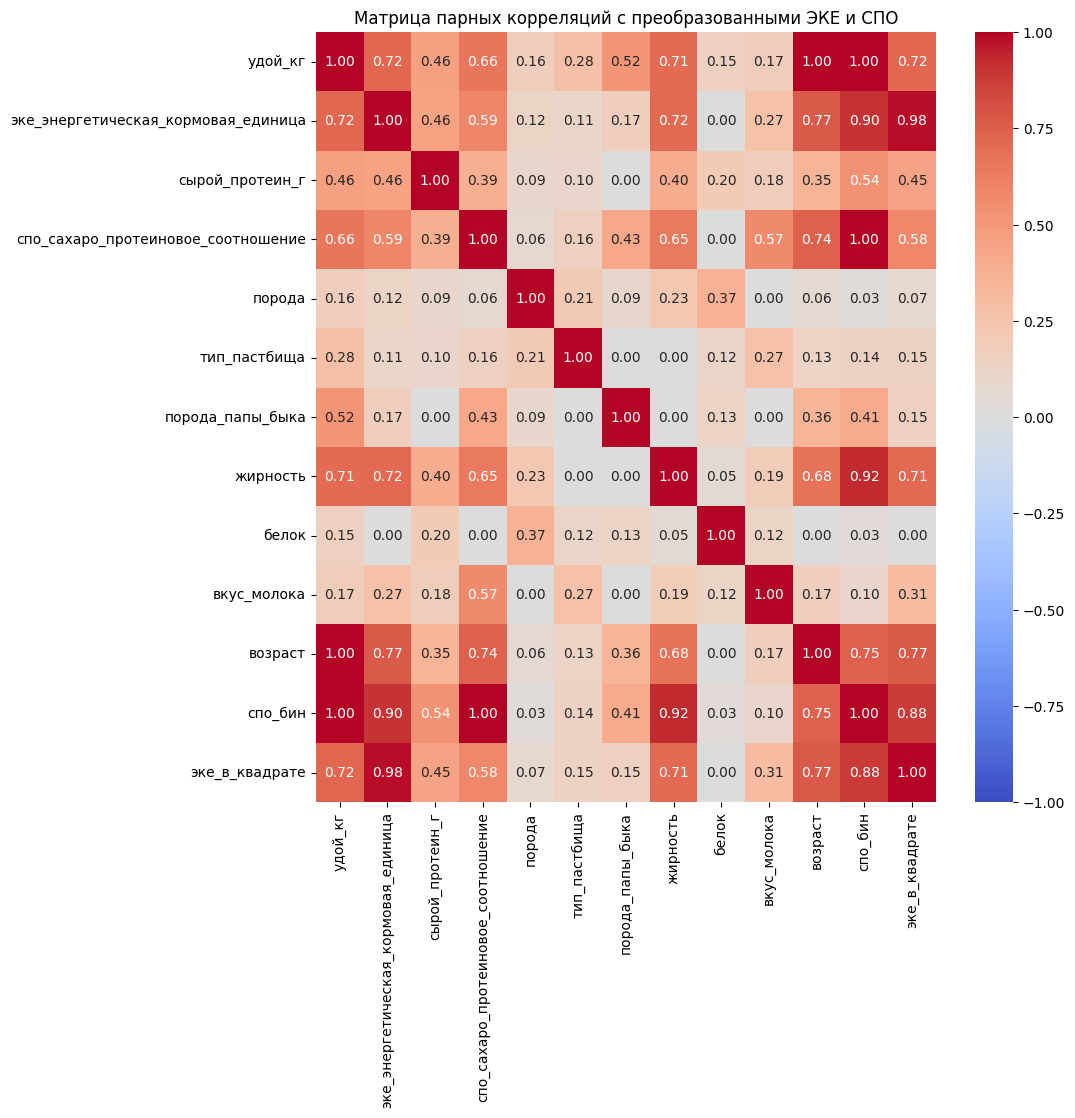

In [59]:
#выберем признаки с непрерывными значениями
#также создадим датафрейм corr_df, в который войдут все признаки исходного кроме id
interval_cols = (['удой_кг', 'эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 
                  'спо_сахаро_протеиновое_соотношение', 'жирность', 'белок', 'эке_в_квадрате'])
corr_df = ferma_main.loc[:, ferma_main.columns != 'id']

#рассчитаем коэффициенты корреляции между всеми признаками
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.phik_matrix(interval_cols=interval_cols),
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.2f').set(title='Матрица парных корреляций с преобразованными ЭКЕ и СПО');

Новый признак `спо_бин` показывает максимальную корреляцию с целевым признаком; при этом с другими необходимыми для обучения модели признаками мультиколлинеарности не наблюдается (хотя с новым признаком `эке_в_квадрате` коэффициент корреляции (0.88) близок к пограничному)

Новый признак `эке_в_квадрате` показывает такую же корреляцию с целевым признаком, как и его прообраз `эке_энергетическая_кормовая_единица` - 0.72. Однако его введение снижает коэффициент корреляции с важным признаком `спо_бин` с 0.90 для прообраза до 0.88, что полезно для избегания мультиколлинеарности.  При этом с другими необходимыми для обучения модели признаками мультиколлинеарности не наблюдается 

Можно переходить к обучению модели 2. При этом прообразы новых признаков также не будем брать всё для той же минимизации мультиколлинеарности

Тренировочная выборка: число строк - 471, число столбцов - 4 
Тестовая выборка: число строк - 157, число столбцов - 4


MAE       MSE   RMSE     R^2
0  154.14  37906.82  194.7  0.8138

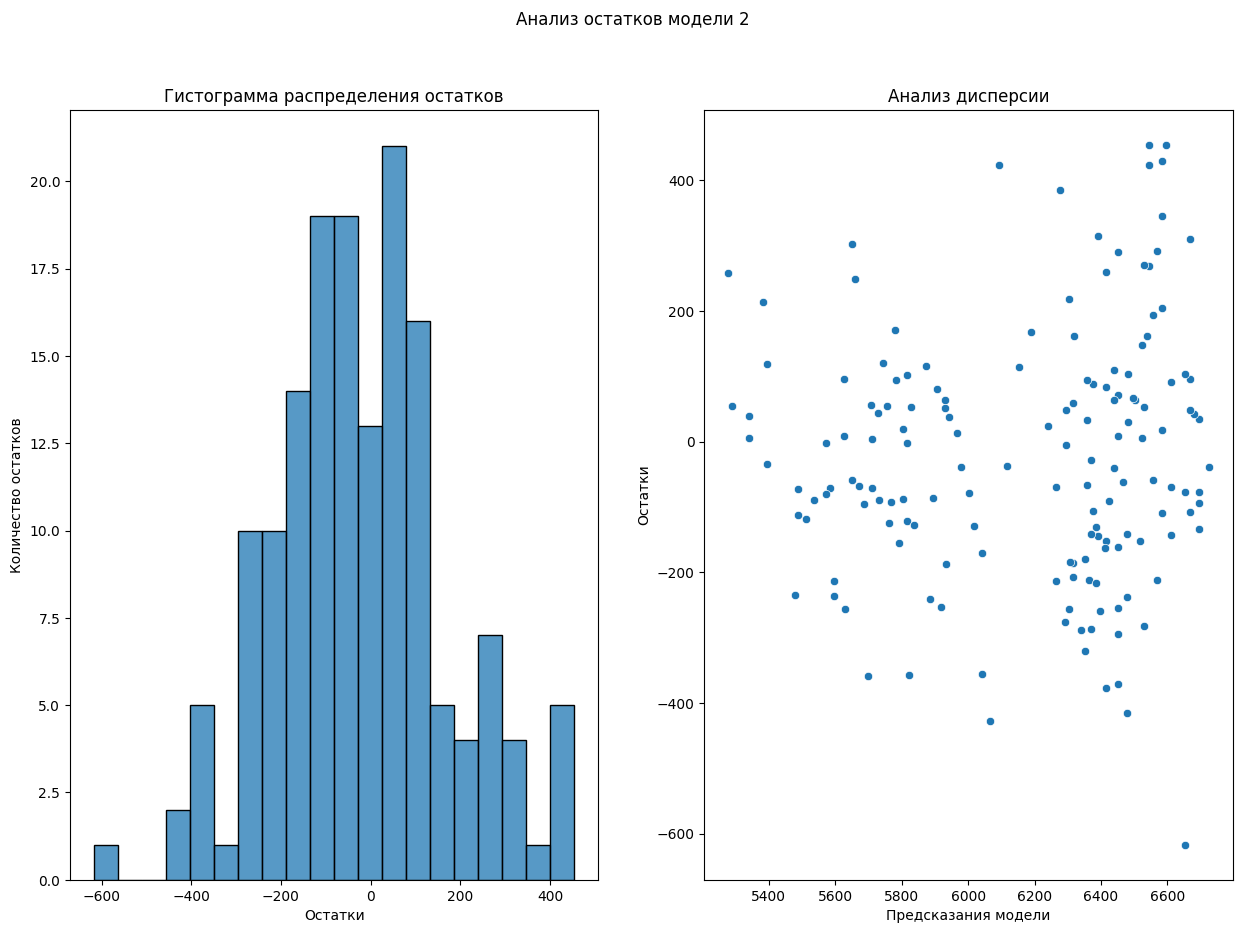

In [60]:
#отбор подходящих признаков, выделение целевого признака
X = ferma_main.drop(['id', 'удой_кг', 'сырой_протеин_г', 'порода', 'тип_пастбища',
                     'жирность', 'белок', 'вкус_молока', 'эке_энергетическая_кормовая_единица', 
                     'спо_сахаро_протеиновое_соотношение'], axis=1)
y = ferma_main['удой_кг']

#разделение данных на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

#проверка корректности разбиения выборок
print(f'Тренировочная выборка: число строк - {X_train.shape[0]}, число столбцов - {X_train.shape[1]} \n'
      f'Тестовая выборка: число строк - {X_test.shape[0]}, число столбцов - {X_test.shape[1]}')

#выделение категориальных и количественных признаков
cat_cols = ['порода_папы_быка', 'возраст', 'спо_бин']
quant_cols =['эке_в_квадрате']


#подготовка данных
encoder_2 = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder_2.fit_transform(X_train[cat_cols])
X_test_ohe = encoder_2.transform(X_test[cat_cols])
encoder_col_names = encoder_2.get_feature_names_out()

scaler_2 = StandardScaler()
X_train_scaled = scaler_2.fit_transform(X_train[quant_cols])
X_test_scaled = scaler_2.transform(X_test[quant_cols])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=quant_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quant_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучение модели
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions_2 = model_lr_2.predict(X_test)
residuals_2 = y_test - predictions_2

#вызов функции для получения метрик и анализа остатков
linreg_analysis(y_test, predictions_2, residuals_2, '2')

R<sup>2</sup> второй модели 0.8138, почти на 0.04 больше, чем первой. MAE уменьшился на 17 единиц (10%), RMSE - почти на 19 (9%). По всем метрикам модель отработала лучше.

Распределение остатков стало лучше. Смещения относительно 0 стало минимальным, однако распределение остатков не нормальное, есть локальные выбросы. По-прежнему присутствуют выбросы в области около -600, хоть их и стало меньше 

Анализ остатков показывает, что их дисперсия стала гораздо более стабильна, распределение остатков близко к равномерному (за исключением выброса)

Всё вышеперечисленное говорит о том, что модель стала гораздо стабильнее (по анализу остатков) и лучше предсказывает целевой признак (анализ метрик). Введение новых признаков улучшило сиуацию, однако ещё есть что совершенствовать

### Модель 3

Добавим новый признак - `имя_папы` из датафрейма `ferma_dad`

In [61]:
#объединяем датафреймы, посмотрим на корректность
ferma_main = pd.merge(ferma_main, ferma_dad, on='id')
ferma_main.head(10)

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   
5   6     5254                                 12.7             1806   
6   7     5910                                 13.2             1792   
7   8     6179                                 14.7             1806   
8   9     6783                                 14.2             1918   
9  10     5339                                 13.4             1791   

   спо_сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                               0.890   Вис Бик Айдиал    Равнинное   
1                               0.890   Вис Бик Айдиал    Равнинное   
2                               0.885  РефлешнСоверинг    Холмистое   
3                               0.885  РефлешнСоверинг    Холмистое   
4                               0.885   Вис Бик Айдиал    Равнинное   
5                               0.885  РефлешнСоверинг    Холмистое   
6                               0.885   Вис Бик Айдиал    Равнинное   
7                               0.930   Вис Бик Айдиал    Равнинное   
8                               0.940  РефлешнСоверинг    Холмистое   
9                               0.895   Вис Бик Айдиал    Холмистое   

  порода_папы_быка  жирность  белок  вкус_молока      возраст      спо_бин  \
0           Айдиал      3.58  3.076            1  более_2_лет   низкое СПО   
1          Соверин      3.54  3.079            1  менее_2_лет   низкое СПО   
2          Соверин      3.59  3.074            0  более_2_лет   низкое СПО   
3           Айдиал      3.40  3.075            0  более_2_лет   низкое СПО   
4          Соверин      3.73  3.073            1  менее_2_лет   низкое СПО   
5          Соверин      3.13  3.078            1  менее_2_лет   низкое СПО   
6          Соверин      3.48  3.077            1  более_2_лет   низкое СПО   
7           Айдиал      3.55  3.076            1  более_2_лет  высокое СПО   
8           Айдиал      3.71  3.077            1  более_2_лет  высокое СПО   
9          Соверин      3.13  3.075            1  менее_2_лет   низкое СПО   

   эке_в_квадрате  имя_папы  
0      201.639995    Буйный  
1      163.840005  Соловчик  
2      196.000000     Барин  
3      153.759991    Буйный  
4      163.840005     Барин  
5      161.289995     Барин  
6      174.239995  Соловчик  
7      216.089994  Геркулес  
8      201.639995    Буйный  
9      179.559990     Барин

In [62]:
ferma_main.tail(10)

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
618  620     6211                            14.200000             1743   
619  621     6813                            14.500000             1712   
620  622     6201                            14.300000             1840   
621  623     6357                            14.200000             1701   
622  624     5928                            13.600000             1832   
623  625     6812                            15.400000             1964   
624  626     5513                            12.900000             1700   
625  627     5970                            14.400000             1837   
626  628     5746                            13.800000             1994   
627  629     6503                            16.200001             2283   

     спо_сахаро_протеиновое_соотношение           порода тип_пастбища  \
618                                0.93  РефлешнСоверинг    Равнинное   
619                                0.96  РефлешнСоверинг    Равнинное   
620                                0.94   Вис Бик Айдиал    Равнинное   
621                                0.93  РефлешнСоверинг    Холмистое   
622                                0.88  РефлешнСоверинг    Холмистое   
623                                0.94  РефлешнСоверинг    Равнинное   
624                                0.88  РефлешнСоверинг    Равнинное   
625                                0.88  РефлешнСоверинг    Холмистое   
626                                0.89  РефлешнСоверинг    Равнинное   
627                                0.94   Вис Бик Айдиал    Холмистое   

    порода_папы_быка  жирность  белок  вкус_молока      возраст      спо_бин  \
618          Соверин      3.72  3.073            0  более_2_лет  высокое СПО   
619           Айдиал      3.72  3.075            1  более_2_лет  высокое СПО   
620           Айдиал      3.64  3.080            0  более_2_лет  высокое СПО   
621          Соверин      3.33  3.076            0  более_2_лет  высокое СПО   
622          Соверин      3.64  3.077            0  более_2_лет   низкое СПО   
623           Айдиал      3.74  3.075            0  более_2_лет  высокое СПО   
624          Соверин      3.64  3.073            1  менее_2_лет   низкое СПО   
625          Соверин      3.64  3.075            0  более_2_лет   низкое СПО   
626          Соверин      3.64  3.077            1  более_2_лет   низкое СПО   
627          Соверин      3.71  3.076            1  более_2_лет  высокое СПО   

     эке_в_квадрате  имя_папы  
618      201.639995  Соловчик  
619      210.250000    Буйный  
620      204.490005    Буйный  
621      201.639995     Барин  
622      184.960010     Барин  
623      237.159988    Буйный  
624      166.409990     Барин  
625      207.359989     Барин  
626      190.440005     Барин  
627      262.440025  Соловчик

In [63]:
ferma_main.shape

(628, 15)

Объединение проведено успешно. Посмотрим на матрицу корреляций с учётом нового признака

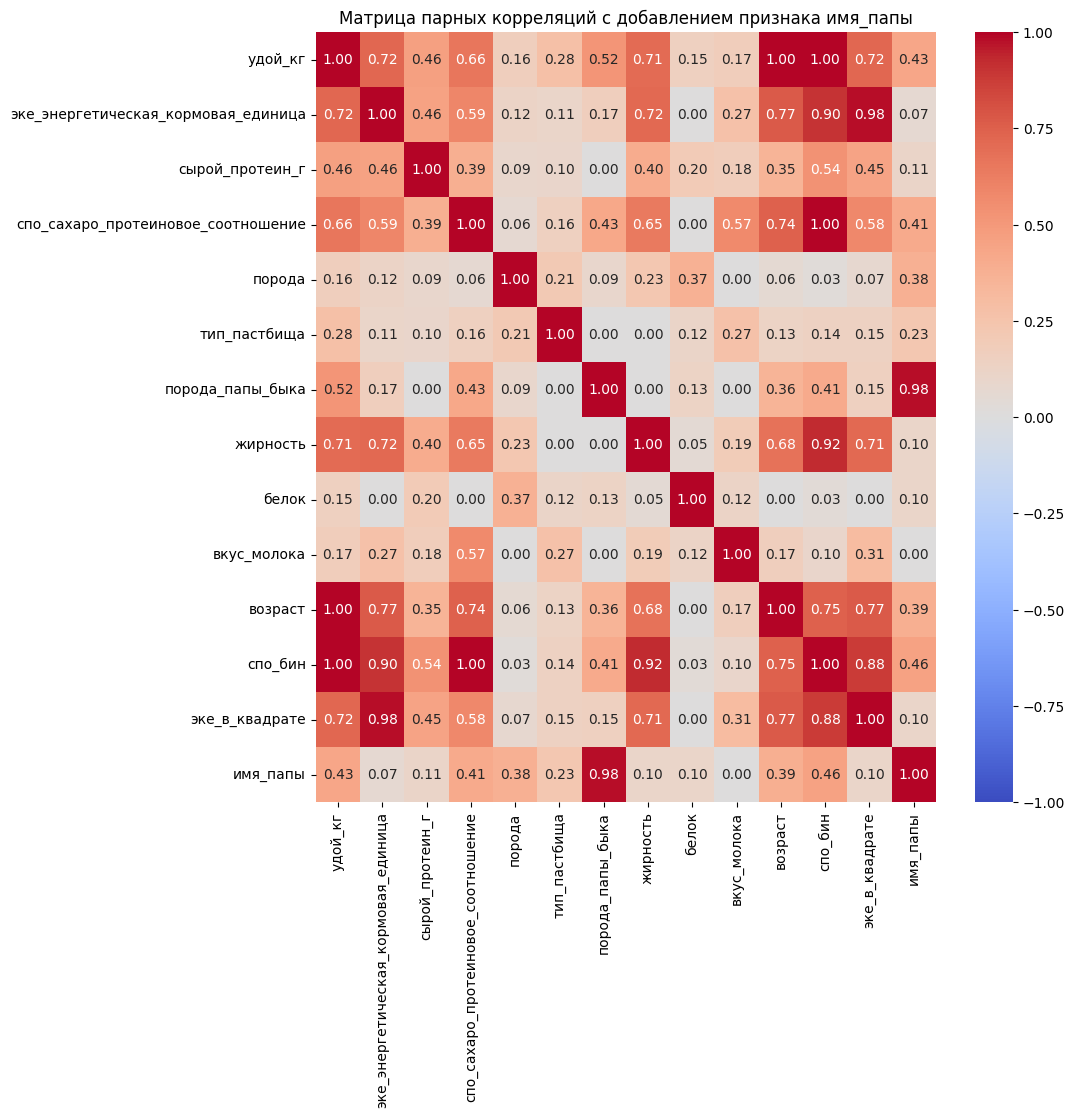

In [64]:
#выберем признаки с непрерывными значениями
#также создадим датафрейм corr_df, в который войдут все признаки исходного кроме id
interval_cols = (['удой_кг', 'эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 
                  'спо_сахаро_протеиновое_соотношение', 'жирность', 'белок', 'эке_в_квадрате'])
corr_df = ferma_main.loc[:, ferma_main.columns != 'id']

#рассчитаем коэффициенты корреляции между всеми признаками
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.phik_matrix(interval_cols=interval_cols),
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.2f').set(title='Матрица парных корреляций с добавлением признака имя_папы');

Судя по хитмапу, наблюдается мультиколлинеарность между признаками `имя_папы` и `порода_папы_быка` (коэффиицент корреляции 0.98). Чтобы качество модели не упало, возьмём для обучения только новый признак. 

При этом стоит отметить, что у нового признака связь с целевой переменной слабее, чем у признака `порода_папы_быка` (0.43 против 0.52). Посмотрим, как это скажется на качестве модели 3

Тренировочная выборка: число строк - 471, число столбцов - 4 
Тестовая выборка: число строк - 157, число столбцов - 4


MAE       MSE    RMSE     R^2
0  149.4  36945.13  192.21  0.8185

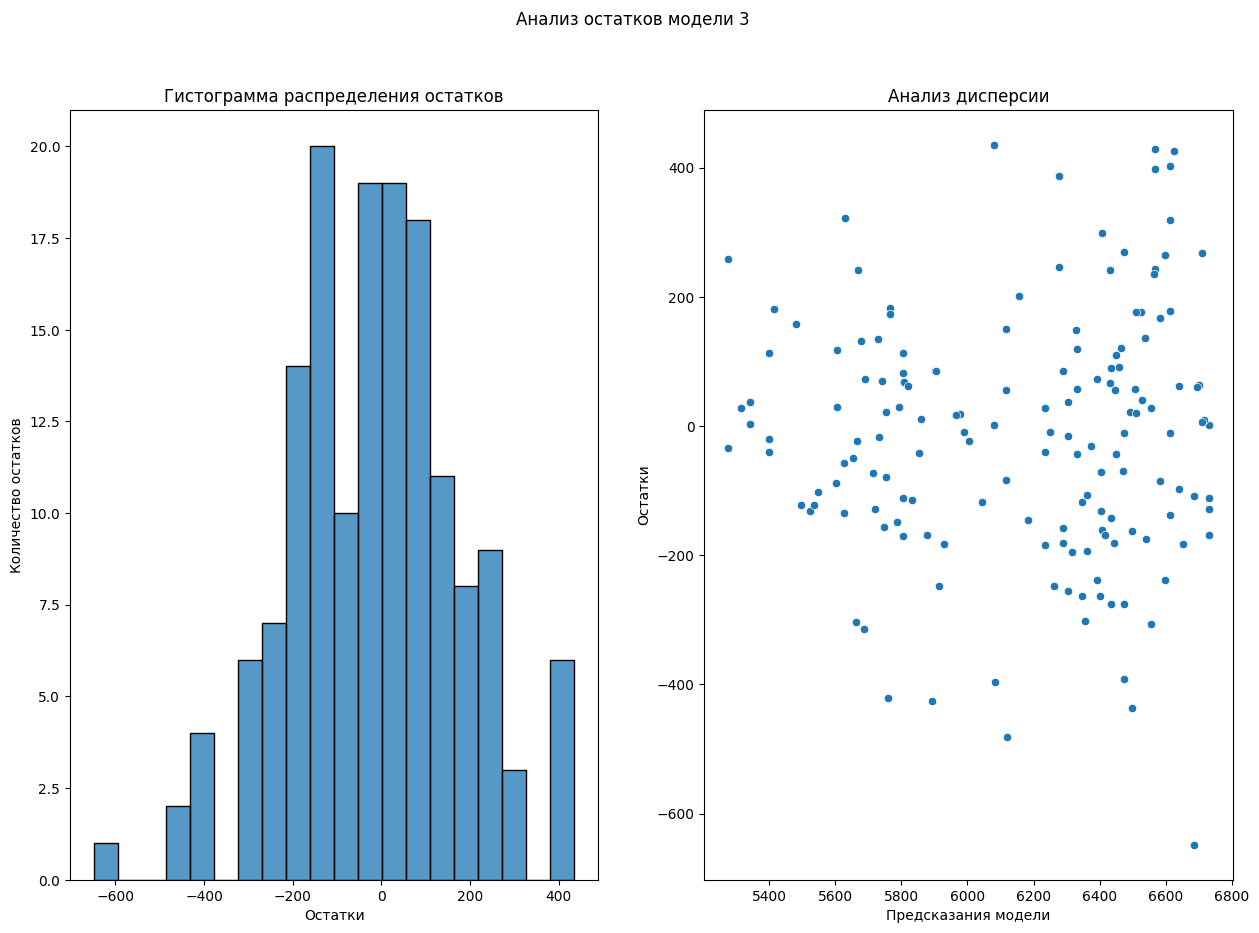

In [65]:
#отбор подходящих признаков, выделение целевого признака
X = ferma_main.drop(['id', 'удой_кг', 'сырой_протеин_г', 'порода', 'тип_пастбища',
                     'жирность', 'белок', 'вкус_молока', 'эке_энергетическая_кормовая_единица', 
                     'спо_сахаро_протеиновое_соотношение', 'порода_папы_быка'], axis=1)
y = ferma_main['удой_кг']

#разделение данных на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

#проверка корректности разбиения выборок
print(f'Тренировочная выборка: число строк - {X_train.shape[0]}, число столбцов - {X_train.shape[1]} \n'
      f'Тестовая выборка: число строк - {X_test.shape[0]}, число столбцов - {X_test.shape[1]}')

#выделение категориальных и количественных признаков
cat_cols = ['имя_папы', 'возраст', 'спо_бин']
quant_cols = ['эке_в_квадрате']


#подготовка данных
encoder_3 = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder_3.fit_transform(X_train[cat_cols])
X_test_ohe = encoder_3.transform(X_test[cat_cols])
encoder_col_names = encoder_3.get_feature_names_out()

scaler_3 = StandardScaler()
X_train_scaled = scaler_3.fit_transform(X_train[quant_cols])
X_test_scaled = scaler_3.transform(X_test[quant_cols])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=quant_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quant_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучение модели
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)
residuals_3 = y_test - predictions_3

#вызов функции для получения метрик и анализа остатков
linreg_analysis(y_test, predictions_3, residuals_3, '3')

Гистограмма выглядит неоптимально, присутствуют "дырки". Посмотрим на неё и гистограмму остатков модели 2 с меньшим количеством бинов

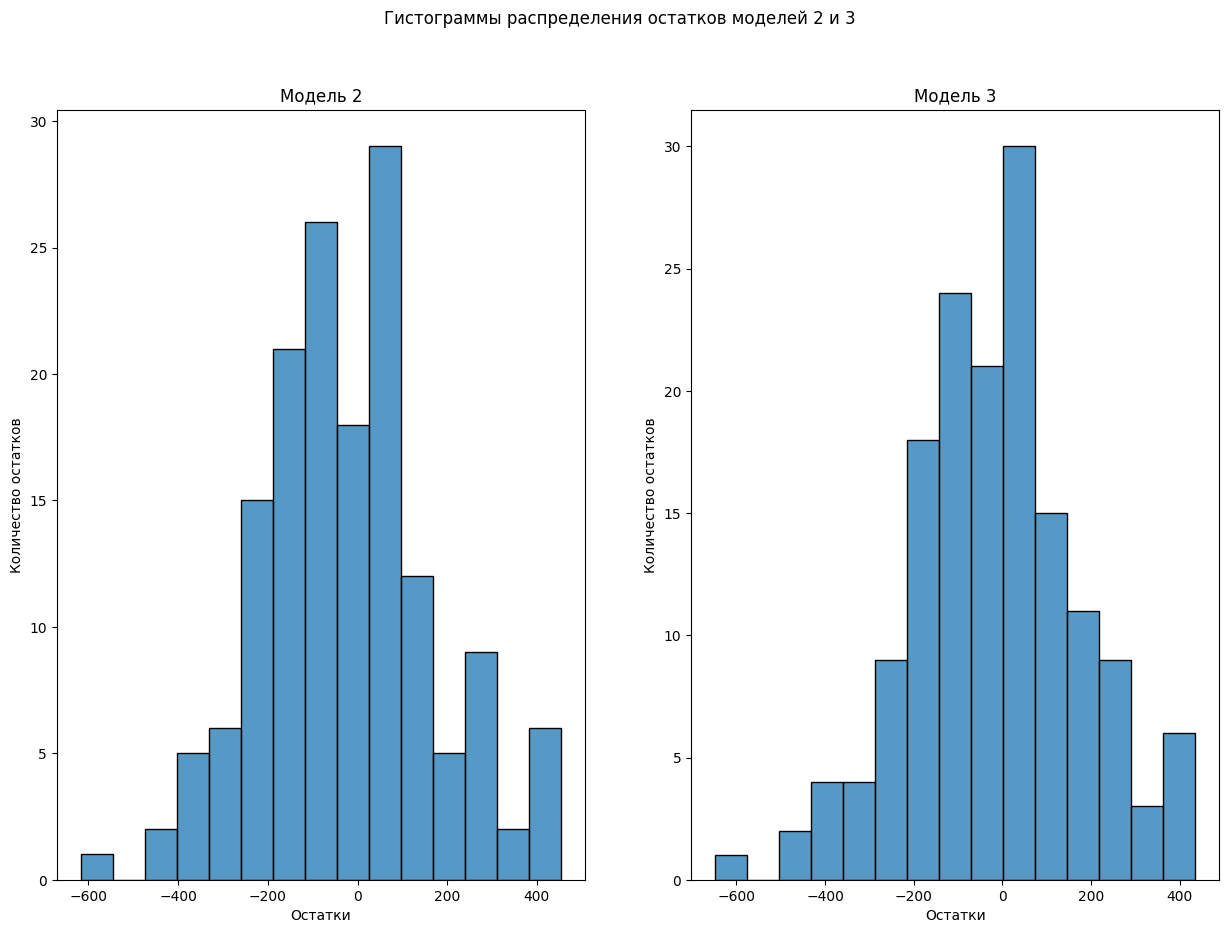

In [66]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Гистограммы распределения остатков моделей 2 и 3')
    
sns.histplot(x=residuals_2,
             bins=15,
             ax=axes[0])
    
axes[0].set(title='Модель 2', 
            xlabel='Остатки',
            ylabel='Количество остатков')
    
sns.histplot(x=residuals_3,
             bins=15,
             ax=axes[1])
    
axes[1].set(title='Модель 3', 
            xlabel='Остатки',
            ylabel='Количество остатков')
plt.show()

R<sup>2</sup> третьей модели 0.8185, что ещё ненамного (0.0047) больше, чем у второй модели (0.8138). MAE уменьшился еще почти на 5 единиц (3%), RMSE - на 2 (1%). По всем метрикам третья модель отработала лучше второй.

Визуально распределение остатков достаточно похоже - в случае модели 3 чуть больше стало остатков с маленьким абсолютным значением. Выбросы в "краевых" областях по-прежнему присутсвуют

Дисперсия остатков также визуально почти не изменилась, возможно, стала чуть более стабильной в области около медианных значений (стало больше точек)

Получили, что третья модель показывает себя чуть лучше второй. Однако по-прежнему есть что улучшать

### Модель 4

Добавим новый категориальный признак на основе признака `жирность`

In [67]:
#функция для категоризации жирности
#применим её к столбцу жирность
def fat_content_bin(x):
    #x - значение жирности
    if x >= 3.65:
        return 'высокая'
    elif x >= 3.55  and x < 3.65:
        return 'средняя'
    else:
        return 'низкая'
    
ferma_main['жирность_бин'] = ferma_main['жирность'].apply(fat_content_bin)
ferma_main.head(15)

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0    1     5863                                 14.2             1743   
1    2     5529                                 12.8             2138   
2    3     5810                                 14.0             1854   
3    4     5895                                 12.4             2012   
4    5     5302                                 12.8             1675   
5    6     5254                                 12.7             1806   
6    7     5910                                 13.2             1792   
7    8     6179                                 14.7             1806   
8    9     6783                                 14.2             1918   
9   10     5339                                 13.4             1791   
10  11     5591                                 13.7             1678   
11  12     6563                                 16.5             2328   
12  13     6173                                 15.4             2193   
13  14     6131                                 14.5             1766   
14  15     6014                                 16.0             1769   

    спо_сахаро_протеиновое_соотношение           порода тип_пастбища  \
0                                0.890   Вис Бик Айдиал    Равнинное   
1                                0.890   Вис Бик Айдиал    Равнинное   
2                                0.885  РефлешнСоверинг    Холмистое   
3                                0.885  РефлешнСоверинг    Холмистое   
4                                0.885   Вис Бик Айдиал    Равнинное   
5                                0.885  РефлешнСоверинг    Холмистое   
6                                0.885   Вис Бик Айдиал    Равнинное   
7                                0.930   Вис Бик Айдиал    Равнинное   
8                                0.940  РефлешнСоверинг    Холмистое   
9                                0.895   Вис Бик Айдиал    Холмистое   
10                               0.895  РефлешнСоверинг    Холмистое   
11                               0.930   Вис Бик Айдиал    Холмистое   
12                               0.930  РефлешнСоверинг    Холмистое   
13                               0.930  РефлешнСоверинг    Равнинное   
14                               0.930   Вис Бик Айдиал    Равнинное   

   порода_папы_быка  жирность  белок  вкус_молока      возраст      спо_бин  \
0            Айдиал      3.58  3.076            1  более_2_лет   низкое СПО   
1           Соверин      3.54  3.079            1  менее_2_лет   низкое СПО   
2           Соверин      3.59  3.074            0  более_2_лет   низкое СПО   
3            Айдиал      3.40  3.075            0  более_2_лет   низкое СПО   
4           Соверин      3.73  3.073            1  менее_2_лет   низкое СПО   
5           Соверин      3.13  3.078            1  менее_2_лет   низкое СПО   
6           Соверин      3.48  3.077            1  более_2_лет   низкое СПО   
7            Айдиал      3.55  3.076            1  более_2_лет  высокое СПО   
8            Айдиал      3.71  3.077            1  более_2_лет  высокое СПО   
9           Соверин      3.13  3.075            1  менее_2_лет   низкое СПО   
10           Айдиал      3.13  3.075            1  менее_2_лет   низкое СПО   
11          Соверин      3.71  3.075            1  более_2_лет  высокое СПО   
12          Соверин      3.72  3.075            1  более_2_лет  высокое СПО   
13           Айдиал      3.61  3.076            0  более_2_лет  высокое СПО   
14           Айдиал      3.71  3.071            0  более_2_лет  высокое СПО   

    эке_в_квадрате  имя_папы жирность_бин  
0       201.639995    Буйный      средняя  
1       163.840005  Соловчик       низкая  
2       196.000000     Барин      средняя  
3       153.759991    Буйный       низкая  
4       163.840005     Барин      высокая  
5       161.289995     Барин       низкая  
6       174.239995  Соловчик       низкая  
7       216.089994  Геркулес       низкая  
8       201.639995   

Новый признак успешно добавлен. Посмотрим на матрицу корреляций с учётом нового признака

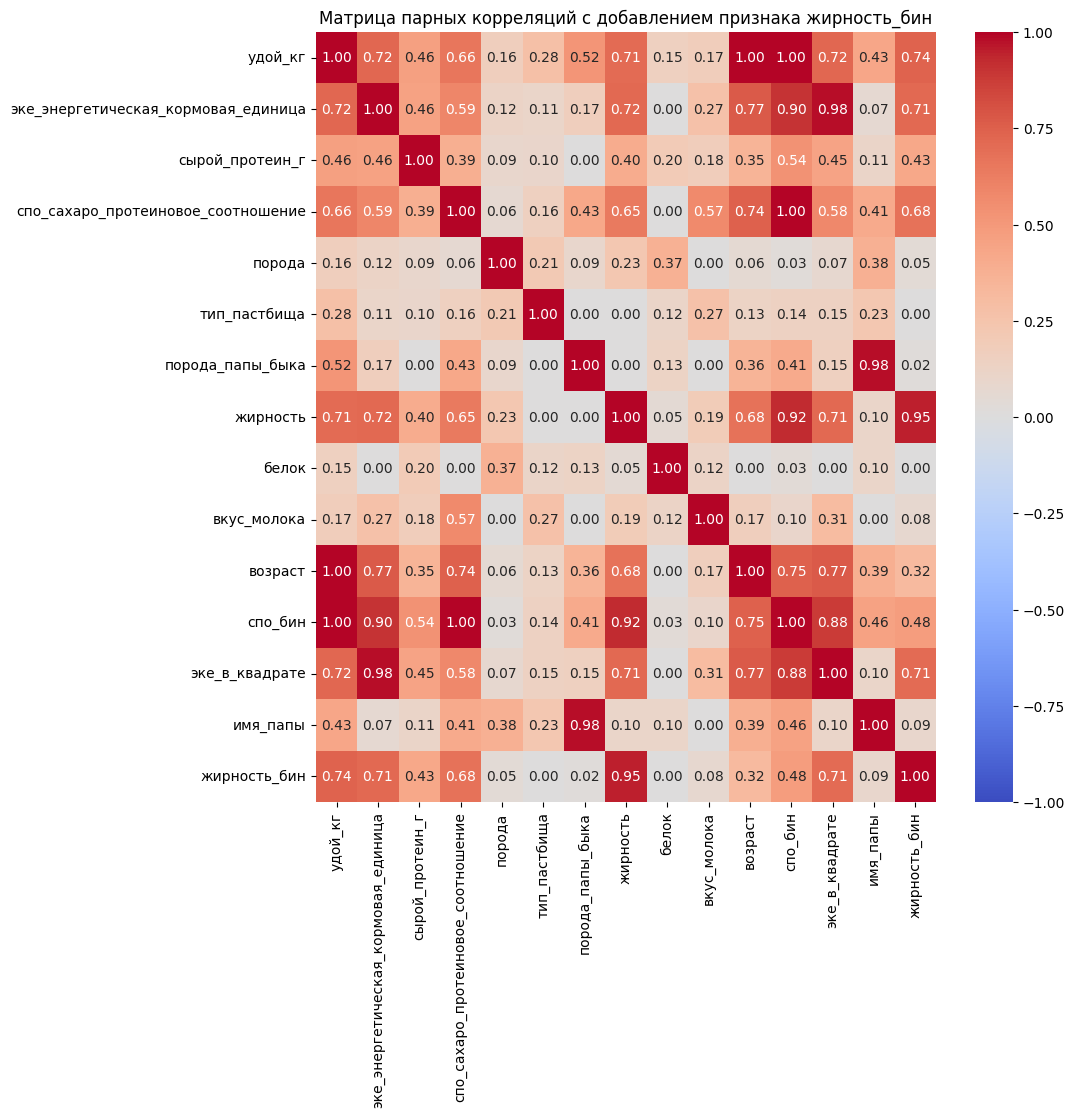

In [68]:
#выберем признаки с непрерывными значениями
#также создадим датафрейм corr_df, в который войдут все признаки исходного кроме id
interval_cols = (['удой_кг', 'эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 
                  'спо_сахаро_протеиновое_соотношение', 'жирность', 'белок', 'эке_в_квадрате'])
corr_df = ferma_main.loc[:, ferma_main.columns != 'id']

#рассчитаем коэффициенты корреляции между всеми признаками
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.phik_matrix(interval_cols=interval_cols),
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.2f').set(title='Матрица парных корреляций с добавлением признака жирность_бин');

Новый признак имеет высокую корреляцию с таргетом (0.74; выше корреляции признака-прообраза `жирность` с таргетом (0.71)), при этом мультиколлинераности с другими нужными нам признаками не наблюдается.

Добавим его к имеющимся.

Тренировочная выборка: число строк - 471, число столбцов - 5 
Тестовая выборка: число строк - 157, число столбцов - 5


MAE       MSE    RMSE     R^2
0  156.01  39021.61  197.54  0.8083

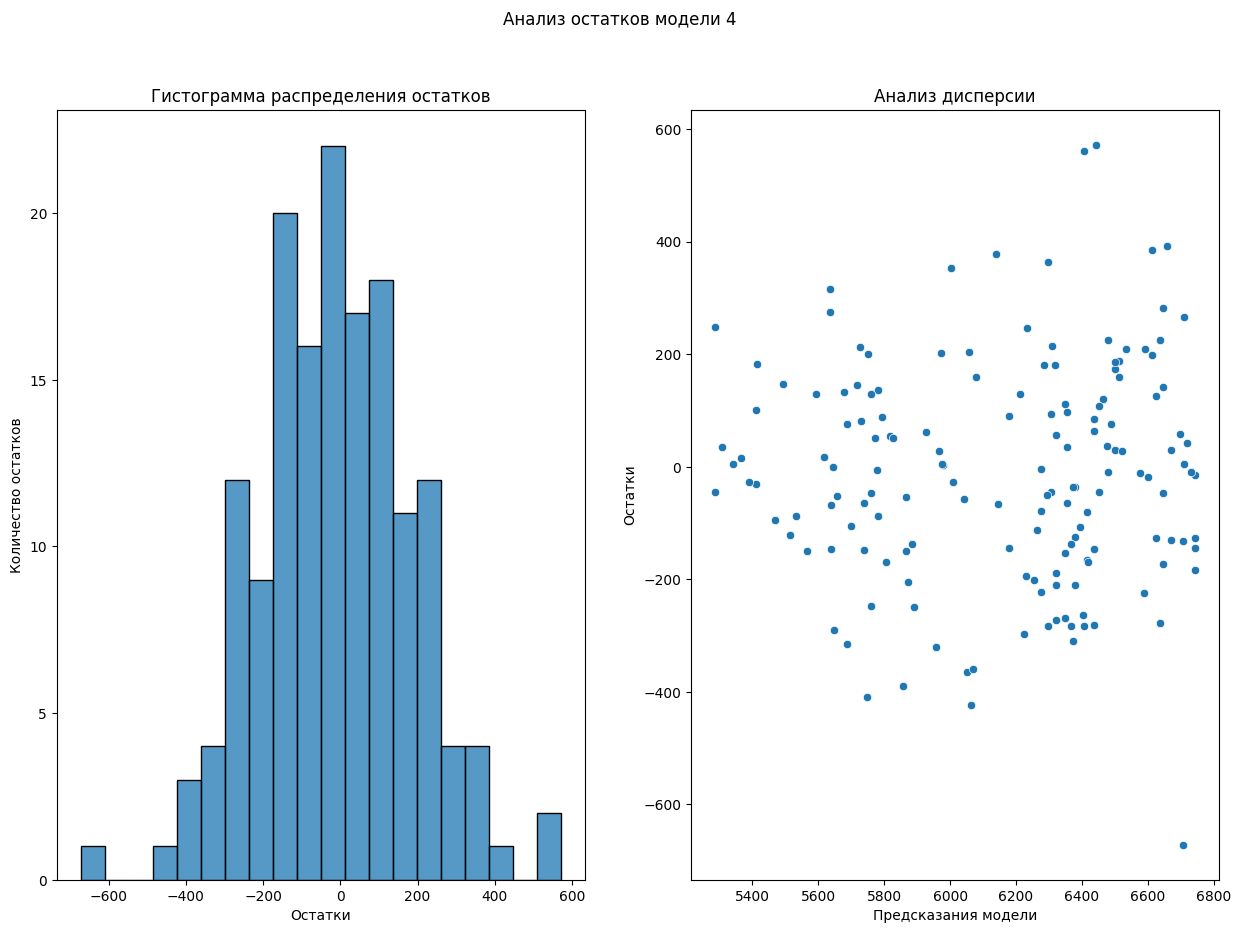

In [69]:
#отбор подходящих признаков, выделение целевого признака
X = ferma_main.drop(['id', 'удой_кг', 'сырой_протеин_г', 'порода', 'тип_пастбища',
                     'жирность', 'белок', 'вкус_молока', 'эке_энергетическая_кормовая_единица', 
                     'спо_сахаро_протеиновое_соотношение', 'порода_папы_быка'], axis=1)
y = ferma_main['удой_кг']

#разделение данных на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

#проверка корректности разбиения выборок
print(f'Тренировочная выборка: число строк - {X_train.shape[0]}, число столбцов - {X_train.shape[1]} \n'
      f'Тестовая выборка: число строк - {X_test.shape[0]}, число столбцов - {X_test.shape[1]}')

#выделение категориальных и количественных признаков
cat_cols = ['имя_папы', 'возраст', 'спо_бин', 'жирность_бин']
quant_cols =['эке_в_квадрате']


#подготовка данных
encoder_4 = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder_4.fit_transform(X_train[cat_cols])
X_test_ohe = encoder_4.transform(X_test[cat_cols])
encoder_col_names = encoder_4.get_feature_names_out()

scaler_4 = StandardScaler()
X_train_scaled = scaler_4.fit_transform(X_train[quant_cols])
X_test_scaled = scaler_4.transform(X_test[quant_cols])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=quant_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quant_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучение модели
model_lr_4 = LinearRegression()
model_lr_4.fit(X_train, y_train)
predictions_4 = model_lr_4.predict(X_test)
residuals_4 = y_test - predictions_4

#вызов функции для получения метрик и анализа остатков
linreg_analysis(y_test, predictions_4, residuals_4, '4')

R<sup>2</sup> четвёртой модели 0.8083, что значимо хуже третьей модели  (0.8185). MAE и RMSE выросли на несколько единицу. По всем метрикам эта модель отработала хуже третьей.

Распределение остатков стало хуже - пояивлись выбросы около -600 и 600. 

Дисперсия остатков была была бы достаточно хороша, если бы не вышеупомянутые выбросы

Получили, что четвёртая модель с добавлением нового признака отработала хуже. Возможно, сказался тот факт, что одна из выделенных категорий в признаке `жирность_бин` отличается по наполнению значений от двух других (что мы видели на диаграммах рассеяния). 

Таким образом, лучше всего себя показала модель 3 на основе признаков `имя_папы`, `возраст`, `спо_бин`, `эке_в_квадрате`. При этом по R<sup>2</sup> она примерно на 0.01 хуже лучшей модели первой попытки. Возможно, сказалось неудаление выбросов

Рассчитаем перцентили остатков и предсказаний

In [70]:
pd.Series(predictions_3).describe(percentiles=[.025, .5, .975 ])

count     157.000000
mean     6158.414581
std       406.822225
min      5276.223241
2.5%     5342.671577
50%      6290.399380
97.5%    6715.461726
max      6729.012309
dtype: float64

С вероятностью 95% значения предсказаний целевой переменной лежат в диапазоне от 5343 до 6715 кг

In [71]:
pd.Series(residuals_3).describe(percentiles=[.025, .5, .975 ])

count    157.000000
mean     -16.758530
std      192.091917
min     -648.118565
2.5%    -421.042065
50%      -10.125864
97.5%    399.001653
max      435.512412
Name: удой_кг, dtype: float64

С вероятностью 95% значения предсказаний остатков лежат в диапазоне от -421 до 399 кг

### Предсказание удоя продаваемых коров

In [72]:
#добавим новые колонки, содержащие средние значени аналогичных из датасета ferma_main
#с учётом коэффициента улучшения 1.05
new_columns = ['эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 'спо_сахаро_протеиновое_соотношение']
for column in new_columns:
    cow_buy[column] = ferma_main[column].mean()*1.05

Также добавим признаки, которые улучшали качество модели на тренировочных данных. Проверим корректность добавления столбцов

In [73]:
#создадим новые признаки, проверим корректность добавления всех признаков
cow_buy['спо_бин'] = cow_buy['спо_сахаро_протеиновое_соотношение'].map(lambda x: 'высокое СПО' if x > 0.91 else 'низкое СПО')
cow_buy['эке_в_квадрате'] = cow_buy['эке_энергетическая_кормовая_единица'].map(lambda x: x**2)
cow_buy['жирность_бин'] = cow_buy['текущая_жирность'].apply(fat_content_bin)
cow_buy

порода тип_пастбища порода_папы_быка  имя_папы  текущая_жирность  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное          Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое           Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное          Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес              3.58   
7    Вис Бик Айдиал    равнинное          Соверин    Буйный              3.57   
8   РефлешнСоверинг    равнинное          Соверин     Барин              3.59   
9   РефлешнСоверинг    холмистое           Айдиал    Буйный              3.40   
10   Вис Бик Айдиал    холмистое          Соверин  Соловчик              3.73   
11  РефлешнСоверинг    равнинное          Соверин  Геркулес              3.73   
12   Вис Бик Айдиал    холмистое           Айдиал  Геркулес              3.68   
13   Вис Бик Айдиал    холмистое          Соверин     Барин              3.42   
14  РефлешнСоверинг    равнинное          Соверин     Барин              3.59   
15  РефлешнСоверинг    холмистое           Айдиал    Буйный              3.40   
16   Вис Бик Айдиал    холмистое          Соверин  Соловчик              3.73   
17  РефлешнСоверинг    равнинное          Соверин  Геркулес              3.77   
18   Вис Бик Айдиал    равнинное          Соверин    Буйный              3.34   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный              3.64   

    текущий_уровень_белок      возраст  эке_энергетическая_кормовая_единица  \
0                   3.076  более_2_лет                            15.276163   
1                   3.081  менее_2_лет                            15.276163   
2                   3.074  более_2_лет                            15.276163   
3                   3.061  более_2_лет                            15.276163   
4                   3.074  более_2_лет                            15.276163   
5                   3.053  менее_2_лет                            15.276163   
6                   3.076  более_2_лет                            15.276163   
7                   3.079  более_2_лет                            15.276163   
8                   3.074  более_2_лет                            15.276163   
9                   3.079  менее_2_лет                            15.276163   
10                  3.055  более_2_лет                            15.276163   
11                  3.073  более_2_лет                            15.276163   
12                  3.046  более_2_лет                            15.276163   
13                  3.075  менее_2_лет                            15.276163   
14                  3.074  более_2_лет                            15.276163   
15                  3.065  более_2_лет                            15.276163   
16                  3.079  более_2_лет                            15.276163   
17                  3.053  менее_2_лет                            15.276163   
18                  3.069  более_2_лет                            15.276163   
19                  3.074  более_2_лет                            15.276163   

    сырой_протеин_г  спо_сахаро_протеиновое_соотношение      спо_бин  \
0       2019.947532                            0.958744  высокое СПО   
1       2019.947532                            0.958744  высокое СПО   
2       2019.947532                            0.958744  высокое СПО   
3       2019.947532                            0.958744  высокое СПО   
4       2019.947532                            0.958744  высокое СПО   
5       2019.947532                            0.958744  высокое СПО   
6       2019.947532                            0.958744  высокое СПО   
7       2019.947532                            0.958744  высокое СПО   
8  

Новые признаки созданы успешно. Можно приступать к получению прогнозных значений удоя

In [74]:
#выделение категориальных и количественных признаков
cat_cols = ['имя_папы', 'возраст', 'спо_бин']
quant_cols =['эке_в_квадрате']


#подготовка данных
X_test_ohe = encoder_3.transform(cow_buy[cat_cols])
encoder_col_names = encoder_3.get_feature_names_out()

X_test_scaled = scaler_3.transform(cow_buy[quant_cols])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=quant_cols)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#получение предсказаний 
predictions = model_lr_3.predict(X_test)

#добавление полученных значений в датафрейм, также добавим индексы коровам 
cow_buy['предсказанный_удой_кг'] = predictions
cow_buy['id'] = range(0, 20)
cow_buy

порода тип_пастбища порода_папы_быка  имя_папы  текущая_жирность  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное          Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое           Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное          Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес              3.58   
7    Вис Бик Айдиал    равнинное          Соверин    Буйный              3.57   
8   РефлешнСоверинг    равнинное          Соверин     Барин              3.59   
9   РефлешнСоверинг    холмистое           Айдиал    Буйный              3.40   
10   Вис Бик Айдиал    холмистое          Соверин  Соловчик              3.73   
11  РефлешнСоверинг    равнинное          Соверин  Геркулес              3.73   
12   Вис Бик Айдиал    холмистое           Айдиал  Геркулес              3.68   
13   Вис Бик Айдиал    холмистое          Соверин     Барин              3.42   
14  РефлешнСоверинг    равнинное          Соверин     Барин              3.59   
15  РефлешнСоверинг    холмистое           Айдиал    Буйный              3.40   
16   Вис Бик Айдиал    холмистое          Соверин  Соловчик              3.73   
17  РефлешнСоверинг    равнинное          Соверин  Геркулес              3.77   
18   Вис Бик Айдиал    равнинное          Соверин    Буйный              3.34   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный              3.64   

    текущий_уровень_белок      возраст  эке_энергетическая_кормовая_единица  \
0                   3.076  более_2_лет                            15.276163   
1                   3.081  менее_2_лет                            15.276163   
2                   3.074  более_2_лет                            15.276163   
3                   3.061  более_2_лет                            15.276163   
4                   3.074  более_2_лет                            15.276163   
5                   3.053  менее_2_лет                            15.276163   
6                   3.076  более_2_лет                            15.276163   
7                   3.079  более_2_лет                            15.276163   
8                   3.074  более_2_лет                            15.276163   
9                   3.079  менее_2_лет                            15.276163   
10                  3.055  более_2_лет                            15.276163   
11                  3.073  более_2_лет                            15.276163   
12                  3.046  более_2_лет                            15.276163   
13                  3.075  менее_2_лет                            15.276163   
14                  3.074  более_2_лет                            15.276163   
15                  3.065  более_2_лет                            15.276163   
16                  3.079  более_2_лет                            15.276163   
17                  3.053  менее_2_лет                            15.276163   
18                  3.069  более_2_лет                            15.276163   
19                  3.074  более_2_лет                            15.276163   

    сырой_протеин_г  спо_сахаро_протеиновое_соотношение      спо_бин  \
0       2019.947532                            0.958744  высокое СПО   
1       2019.947532                            0.958744  высокое СПО   
2       2019.947532                            0.958744  высокое СПО   
3       2019.947532                            0.958744  высокое СПО   
4       2019.947532                            0.958744  высокое СПО   
5       2019.947532                            0.958744  высокое СПО   
6       2019.947532                            0.958744  высокое СПО   
7       2019.947532                            0.958744  высокое СПО   
8  

Для всех коров полученные предсказания оказались выше требуемых заказчиком 6000 кг удоя молока в год. Таким образом, первому критерию от фермера удовлетворяют 100% коров.
 


Таким образом, на этом шаге с помощью моделей линейной регрессии были получены предсказания удоя продаваемых коров. Среди четырёх обученных моделей была выбрана наилучшая - третья, показавшая лучшие результаты на тренировочных данных как по метрикам, так и по анализу остатков. Данная модель использовалась для предсказания удоя продаваемых коров. Полученные результаты показали, что предсказанные значения удоя для всех 20 продаваемых коров удовлетворяют требованиям заказчика. 

## Обучение модели логистической регрессии

In [75]:
#функция для анализа моделей логистической регрессии
def logreg_analysis(y_test, predictions):
    #y_test - контрольные значения таргета
    #predictions - предсказания 
    
    
    #получаем confusion_matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='crest')
    plt.ylabel('Контрольные значения')
    plt.xlabel('Предсказания')
    plt.show() 
   
    #рассчитываем основные метрики
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    data = {
        'Accuracy': [round(accuracy, 3)],
        'Precision': [round(precision, 3)],
        'Recall': [round(recall, 3)],
        'f1': [round(f1, 3)],
        'ROC-AUC': [round(roc_auc, 3)]
    }
    metrics = pd.DataFrame(data=data)
    return metrics

### Первая модель логистической регрессии

Посмотрим ещё раз на матрицу корреляций, теперь уже в отношении целевого признака `Вкус молока`

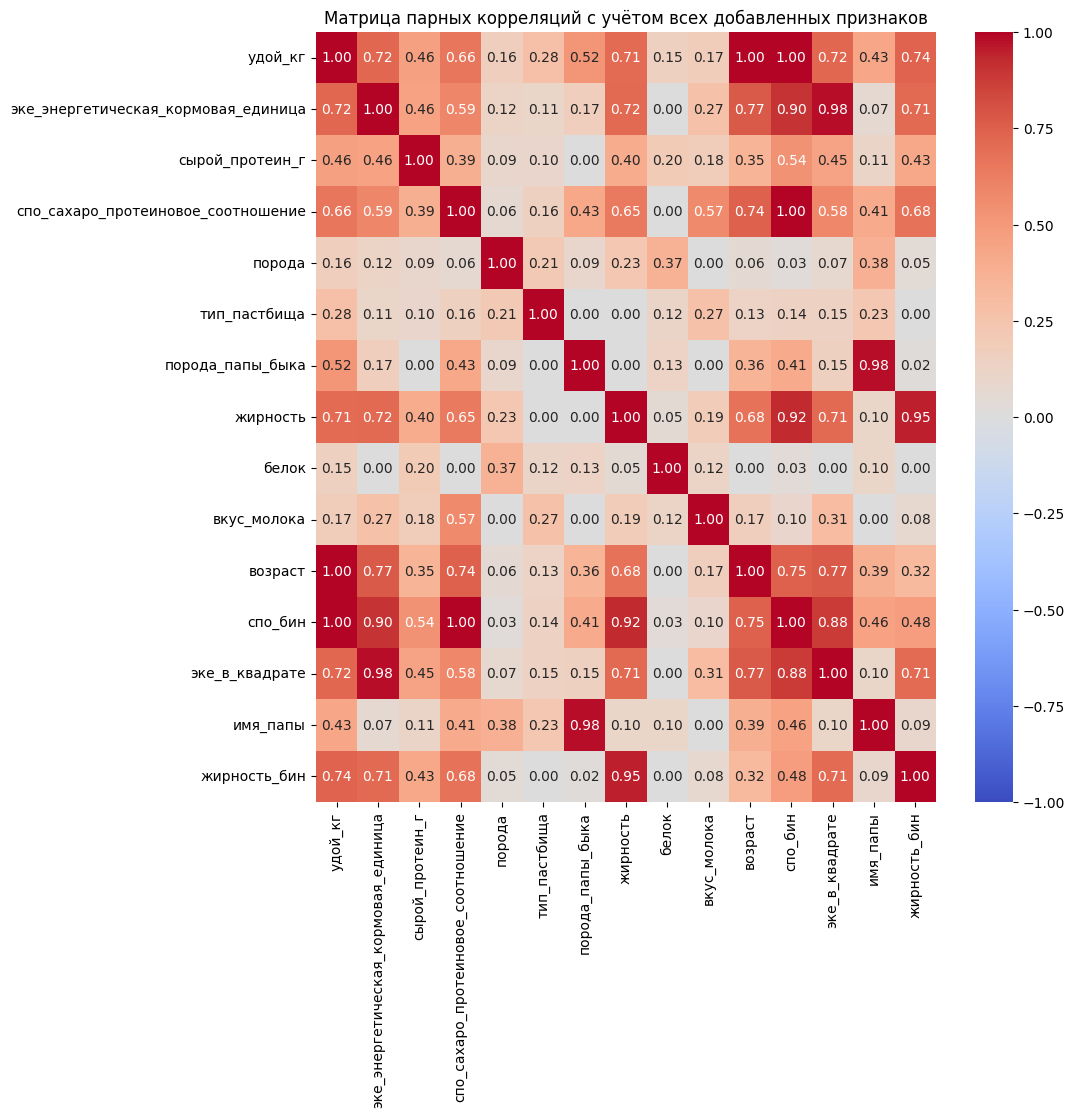

In [76]:
#выберем признаки с непрерывными значениями
#также создадим датафрейм corr_df, в который войдут все признаки исходного кроме id
interval_cols = (['удой_кг', 'эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 
                  'спо_сахаро_протеиновое_соотношение', 'жирность', 'белок', 'эке_в_квадрате'])
corr_df = ferma_main.loc[:, ferma_main.columns != 'id']

#рассчитаем коэффициенты корреляции между всеми признаками
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.phik_matrix(interval_cols=interval_cols),
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.2f').set(title='Матрица парных корреляций с учётом всех добавленных признаков');

Отсечём следующие признаки:
*    `id` - идентификатор, не нужен;
*    `удой_кг`, `вкус_молока` - целевые признаки;
*     `имя_папы` - мультиколлинеарен признаку `порода_папы_быка`;
*    `эке_энергетическая_кормовая_единица` - мультиколлинеарен признаку `эке_в_квадрате`, но даёт меньший коэффициент корреляции с целевым признаком по сравнению с `эке_в_квадрате` (0.27 против 0.31);
*    `жирность_бин` - мультиколлинеарен признаку `жирность`, но даёт меньший коэффициент корреляции с целевым признаком по сравнению с `жирность` (0.08 против 0.19);
*    `спо_бин` - мультиколлинеарен признаку `спо_сахаро_протеиновое_соотношение`, но даёт меньший коэффициент корреляции с целевым признаком по сравнению с `спо_сахаро_протеиновое_соотношение` (0.57 против 0.1);

Остальные признаки оставим ввиду  корреляции их с целевым признаком - нет отдельных сильно коррелирующих с таргетом признаков помимо `спо_сахаро_протеиновое_соотношение`, влияние оставшихся признаков  достаточно схоже (если смотреть на коэффициент корреляции).

Можно приступить к обучению модели.

Тренировочная выборка: число строк - 471, число столбцов - 9 
Тестовая выборка: число строк - 157, число столбцов - 9


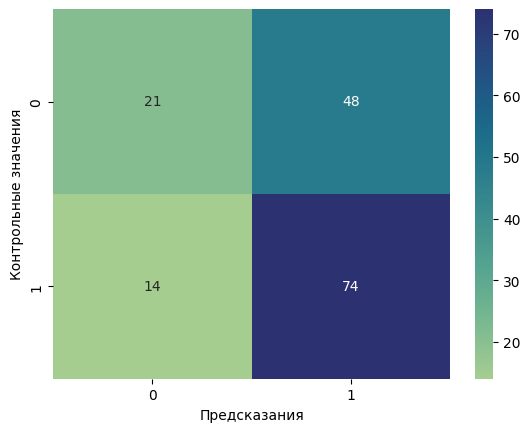

Accuracy  Precision  Recall     f1  ROC-AUC
0     0.605      0.607   0.841  0.705    0.573

In [77]:
#отбор подходящих признаков, выделение целевого признака
X = ferma_main.drop(['id', 'удой_кг', 'вкус_молока', 
                     'эке_энергетическая_кормовая_единица', 'имя_папы', 'спо_бин', 'жирность_бин'], axis=1)
y = ferma_main['вкус_молока']

#разделение данных на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

#проверка корректности разбиения выборок
print(f'Тренировочная выборка: число строк - {X_train.shape[0]}, число столбцов - {X_train.shape[1]} \n'
      f'Тестовая выборка: число строк - {X_test.shape[0]}, число столбцов - {X_test.shape[1]}')

#выделение категориальных и количественных признаков
cat_cols = ['тип_пастбища', 'возраст', 'порода', 'порода_папы_быка']
quant_cols = (['сырой_протеин_г', 'эке_в_квадрате', 'спо_сахаро_протеиновое_соотношение',
               'жирность', 'белок'])


#подготовка данных
encoder_5 = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder_5.fit_transform(X_train[cat_cols])
X_test_ohe = encoder_5.transform(X_test[cat_cols])
encoder_col_names = encoder_5.get_feature_names_out()

scaler_5 = StandardScaler()
X_train_scaled = scaler_5.fit_transform(X_train[quant_cols])
X_test_scaled = scaler_5.transform(X_test[quant_cols])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=quant_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quant_cols)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучение модели
clf_1 = LogisticRegression(random_state=42)
clf_1 = clf_1.fit(X_train, y_train)
predictions = clf_1.predict(X_test)


#вызов функции для получения метрик и анализа остатков
logreg_analysis(y_test, predictions)

Получили не очень высокие значения метрик. Судя по `accuracy`, модель верно предсказывает класс примерно 60% особей. При этом `recall` сильно больше, чем `precision` -  модель лучше справляется с поиском всего вкусного молока (минимиазация ошибок второго рода и FN), чем с точностью определения вкусного молока (минимизация ошибок первого рода и FP).

Так как нам важно, чтобы заказчик точно получил вкусное молоко, нам нужно минимизировать ошибки первого рода (FP, в идеале - свести их к нулю). За это отвечает максимизация метрики `precision`

Также получим коэффициенты обученной модели

In [78]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf_1.coef_[0, feature_number]
    print(f"{feature_name:<40}: {weight:+.6f}") 

тип_пастбища_Холмистое                  : +0.516772
возраст_менее_2_лет                     : -0.093985
порода_РефлешнСоверинг                  : +0.087467
порода_папы_быка_Соверин                : +0.132890
сырой_протеин_г                         : +0.063200
эке_в_квадрате                          : +0.348403
спо_сахаро_протеиновое_соотношение      : +0.195349
жирность                                : -0.142523
белок                                   : +0.252042


Видно, что наибольшие веса имеют бинарный признак `тип_пастбища` (характеристика пастбища) и количественный `эке_в_квадрате` (характеристика корма). Остальные признаки оказывают меньшее влияние

### Оптимизация модели

In [79]:
#создадим датафрейм с меткамии классов и вероятностями принадлежности к классу 1 нашей модели
y_proba = clf_1.predict_proba(X_test)[:,1]

thresholds_data = pd.DataFrame(zip(y_test, y_proba), 
                               columns = ['y_valid', 'y_proba'])

#создадим датафрейм с метриками при данном порогом
metrics_data = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Recall', 'f1'])

thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 100, endpoint=False)]

#будем проходить по циклу с перебором значений порога
#в датафрейм thresholds_data будем добавлять метки классов в зависимости от порога
#в датафрейм metrics_data - метрики в зависимости от порога
for i in thresholds:
    thresholds_data['y_pred_'+str(i)] = thresholds_data['y_proba'].apply(lambda x: 1 if x >= i else 0)
    accuracy = accuracy_score(y_test, thresholds_data['y_pred_'+str(i)])
    precision = precision_score(y_test, thresholds_data['y_pred_'+str(i)])
    recall = recall_score(y_test, thresholds_data['y_pred_'+str(i)])
    f1 = f1_score(y_test, thresholds_data['y_pred_'+str(i)])
    metrics_data.loc[len(metrics_data)] = [i, accuracy, precision, recall, f1]

C:\Users\ADMIN\anaconda3\envs\practicum\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\anaconda3\envs\practicum\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\anaconda3\envs\practicum\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\anac

In [80]:
#посмотрим, при каком значении порога достигается максимум метрики precision
metrics_data.set_index('Threshold',inplace=True)
metrics_data.sort_values(by='Precision', ascending=False).head(20)

Accuracy  Precision    Recall        f1
Threshold                                         
0.76       0.522293   0.882353  0.170455  0.285714
0.79       0.477707   0.875000  0.079545  0.145833
0.75       0.554140   0.875000  0.238636  0.375000
0.77       0.503185   0.857143  0.136364  0.235294
0.74       0.560510   0.851852  0.261364  0.400000
0.78       0.490446   0.833333  0.113636  0.200000
0.78       0.490446   0.833333  0.113636  0.200000
0.73       0.554140   0.800000  0.272727  0.406780
0.69       0.592357   0.750000  0.409091  0.529412
0.81       0.452229   0.750000  0.034091  0.065217
0.80       0.452229   0.750000  0.034091  0.065217
0.72       0.547771   0.742857  0.295455  0.422764
0.70       0.579618   0.739130  0.386364  0.507463
0.71       0.554140   0.725000  0.329545  0.453125
0.67       0.592357   0.722222  0.443182  0.549296
0.68       0.579618   0.720000  0.409091  0.521739
0.68       0.579618   0.720000  0.409091  0.521739
0.64       0.617834   0.705882  0.545455  0.615385
0.62       0.643312   0.705128  0.625000  0.662651
0.66       0.598726   0.704918  0.488636  0.577181

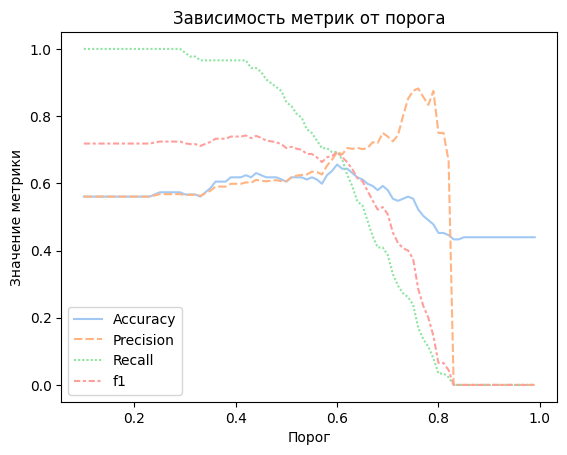

In [81]:
#посмотрим на поведение метрик в зависимости от threshold
sns.lineplot(data=metrics_data,
             palette='pastel').set(title='Зависимость метрик от порога', 
                                   xlabel='Порог',
                                   ylabel='Значение метрики')
plt.show()

Получили, что максимальное значение `precision`, равное 0.882, достигается при пороге 0.76. 

In [82]:
#сохраним значения оптимального порога
precision_threshold = 0.76

Посмотрим на `confusion_matrix` и метрики при этом значении порога

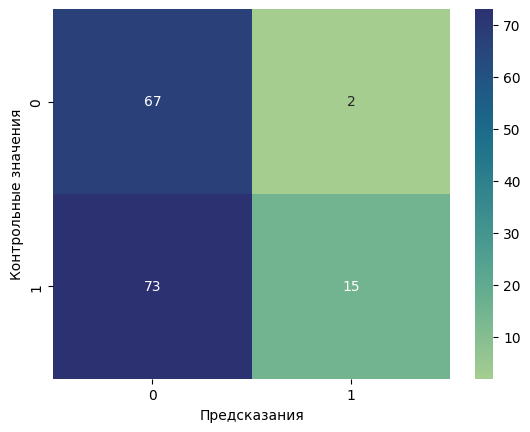

Accuracy  Precision  Recall     f1  ROC-AUC
0     0.522      0.882    0.17  0.286    0.571

In [83]:
logreg_analysis(y_test, thresholds_data['y_pred_0.76'])

Получили, что при оптимальном пороге (максимизация `precision`) молоко, предсказанное моделью как вкусное, с вероятностью 0.882 действительно будет вкусное, и с вероятностью 0.118 - невкусное. Таков минимальный риск для нашей оптимальной модели и порога.

Ожидаемо при максимизации точности просело значение полноты. Однако модель всё равно верно классифицирует примерно 52% объектов, в том числе есть 15 примеров верно определённого вкусного молока

Таким образом, на тренировочных данных была обучена модель логистической регрессии, а также был подобран порог классификации, при котором максимизируется точность модели, что минимизирует вероятность ошибочной классификации невкусного молока как вкусного.

Можно переходить к прогнозированию вкуса молока продаваемых коров.

In [84]:
#заменим значения в столбце тип_пастбища для избежания ошибок в encoder
cow_buy['тип_пастбища'].replace({'холмистое':'Холмистое',
                                 'равнинное':'Равнинное'},
                                 inplace=True)
#также переименуем некоторые столбцы для единообразия
cow_buy.rename(columns={'текущий_уровень_белок':'белок',
                'текущая_жирность':'жирность'},
                inplace=True)
cow_buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  жирность  белок  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес      3.58  3.076   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный      3.54  3.081   
2  РефлешнСоверинг    Равнинное          Соверин     Барин      3.59  3.074   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный      3.40  3.061   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный      3.64  3.074   

       возраст  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0  более_2_лет                            15.276163      2019.947532   
1  менее_2_лет                            15.276163      2019.947532   
2  более_2_лет                            15.276163      2019.947532   
3  более_2_лет                            15.276163      2019.947532   
4  более_2_лет                            15.276163      2019.947532   

   спо_сахаро_протеиновое_соотношение      спо_бин  эке_в_квадрате  \
0                            0.958744  высокое СПО      233.361168   
1                            0.958744  высокое СПО      233.361168   
2                            0.958744  высокое СПО      233.361168   
3                            0.958744  высокое СПО      233.361168   
4                            0.958744  высокое СПО      233.361168   

  жирность_бин  предсказанный_удой_кг  id  
0      средняя            6561.902740   0  
1       низкая            6346.171663   1  
2      средняя            6301.021851   2  
3       низкая            6551.043944   3  
4      средняя            6551.043944   4

### Прогнозирование вкуса молока продаваемых коров

In [85]:
#выделение категориальных и количественных признаков
cat_cols = ['тип_пастбища', 'возраст', 'порода', 'порода_папы_быка']
quant_cols = (['сырой_протеин_г', 'эке_в_квадрате', 'спо_сахаро_протеиновое_соотношение',
               'жирность', 'белок'])


#подготовка данных
X_test_ohe = encoder_5.transform(cow_buy[cat_cols])
encoder_col_names = encoder_5.get_feature_names_out()

X_test_scaled = scaler_5.transform(cow_buy[quant_cols])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=quant_cols)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#получение предсказаний, добавление полученных значений в датафрейм, вычесление целевого признака
predictions = clf_1.predict(X_test)
y_proba = clf_1.predict_proba(X_test)[:,1]
cow_buy['y_proba'] = y_proba
cow_buy['вкус_молока'] = cow_buy['y_proba'].map(lambda x:'вкусно' if x > precision_threshold
                                                else 'не вкусно')
cow_buy

порода тип_пастбища порода_папы_быка  имя_папы  жирность  белок  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес      3.58  3.076   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный      3.54  3.081   
2   РефлешнСоверинг    Равнинное          Соверин     Барин      3.59  3.074   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный      3.40  3.061   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный      3.64  3.074   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес      3.63  3.053   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес      3.58  3.076   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный      3.57  3.079   
8   РефлешнСоверинг    Равнинное          Соверин     Барин      3.59  3.074   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный      3.40  3.079   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик      3.73  3.055   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес      3.73  3.073   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес      3.68  3.046   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин      3.42  3.075   
14  РефлешнСоверинг    Равнинное          Соверин     Барин      3.59  3.074   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный      3.40  3.065   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик      3.73  3.079   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес      3.77  3.053   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный      3.34  3.069   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный      3.64  3.074   

        возраст  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   более_2_лет                            15.276163      2019.947532   
1   менее_2_лет                            15.276163      2019.947532   
2   более_2_лет                            15.276163      2019.947532   
3   более_2_лет                            15.276163      2019.947532   
4   более_2_лет                            15.276163      2019.947532   
5   менее_2_лет                            15.276163      2019.947532   
6   более_2_лет                            15.276163      2019.947532   
7   более_2_лет                            15.276163      2019.947532   
8   более_2_лет                            15.276163      2019.947532   
9   менее_2_лет                            15.276163      2019.947532   
10  более_2_лет                            15.276163      2019.947532   
11  более_2_лет                            15.276163      2019.947532   
12  более_2_лет                            15.276163      2019.947532   
13  менее_2_лет                            15.276163      2019.947532   
14  более_2_лет                            15.276163      2019.947532   
15  более_2_лет                            15.276163      2019.947532   
16  более_2_лет                            15.276163      2019.947532   
17  менее_2_лет                            15.276163      2019.947532   
18  более_2_лет                            15.276163      2019.947532   
19  более_2_лет                            15.276163      2019.947532   

    спо_сахаро_протеиновое_соотношение      спо_бин  эке_в_квадрате  \
0                             0.958744  высокое СПО      233.361168   
1                             0.958744  высокое СПО      233.361168   
2                             0.958744  высокое СПО      233.361168   
3                             0.958744  высокое СПО      233.361168   
4                             0.958744  высокое СПО      233.361168   
5                             0.958744  высокое СПО      233.361168   
6                             0.958744  высокое СПО      233.361168   
7                             0.958744  высокое СПО      233.361168   
8                             0.958744  высокое СПО      233.361168   
9                             0.958744  высокое СПО      233.361168   
10               

Как видно из столбца вкус_молока, четыре коровы (`id` = 1, 9, 13 и 16) по результатам классификации нашей модели являются носительницами вкусного молока. Таким образом, на контрольном датасете было установлено, что с учётом ранее определённого порога классификации лишь четыре коровы (`id` = 1, 9, 13 и 16) максимально близки к требованиям заказчика по прогнозируемому удою и вкусу молока


С учётом того, что модель линейной регрессии спрогнозировала удовлетворительный для заказчика удой всех коров, фермеру можно посоветовать следующее:
* если фермеру нужно купить корову, которая гарантировано удовлетворит его условиям - ни одной коровы покупать нельзя, так как наша модель не научилась определять вкусное молоко гарантировано; нужно корректировать вкусовые характеристики или искать новых продаваемых коров;
* если фермеру точно нужно купить хотя бы одну особь - надо брать корову с `id` == 9 - модель наиболее уверена в этой особи, что у неё будет вкусное молоко (вероятность принадлежности к классу `вкусно` - 0.828);
* если же фермер доверяет предсказаниям нашей модели и его не смущает точночть не равная 1 - можно ещё взять коров с `id` = 1, 13 или 16, наша модель предсказывает, что у этих коров тоже будет вкусное молоко.

## Итоговые выводы

1. **Загрузка данных**

Данные успешно загружены, названия столбцов приведены к каноническому виду

2. **Предобработка данных**

* изменены некоторые типы данных;
* обработаны явные дубликаты;
* установлено отсутствие пропусков;

3. **Исследовательский анализ данных**

Категориальные и количественные признаки в 3 датафреймах проанализированы статистически и с помощью графиков.

* датафрейм `ferma_main`:
    * в признаке `удой_кг`  удалены выбросы
    * в признаках `тип_пастбища`, `порода_папы_быка` удалены неявные дубликаты в названиях категорий классов
    * установлено, что присутствуют количественные признаки с ненормальным распределением, а также категориальные с неравномерным распределением классов. В будущем для улучшения прогнозирования необходимо улучшить качество данных -  сбалансировать классы, нормализовать количественные признаки
 
* датафрейм `ferma_dad`:
    * удалена запись с `id`, совпадающим с `id` удалённой записи из датафрейма `ferma_main`
    
* датафрейм `cow_buy`:
    * установлено, что присутствуют количественные признаки с ненормальным распределением, а также категориальные с неравномерным распределением классов. Однако ввиду малого числа записей делать строгие выводы не представлется возможным.
    
Общая рекомендация на будущее - улучшение качества данных как для категориальных, так и для количественных признаков для получения более сбалансированных и качественных данных

4. **Корреляционный анализ**

Были посчитаны и изучены корреляции между всеми признаками. Отобраны потенциально подходящие для модели линейной регрессии признаки (`порода_папы_быка`,  `возраст`, `эке_энергетическая_кормовая_единица` и `спо_сахаро_протеиновое_соотношение`) как имеющие наибольшие коэффициенты корреляции с целевым признаком. Установлено отсутствие мультиколлинеарности между входными признаками.

Также с помощью диграмм рассеяния между целевым признаком и количественными признаками с учетом категориальных признаков были изучены виды связей между целевым и входными признаками. Обнаружена  нелинейная связь между `СПО` и целевым признаком,  а также между `эке_энергетическая_кормовая_единица` и целевым признаком, между признаком `жирность` и таргетом.

5. **Обучение модели линейной регрессии**

Были обучены четыре модели линейной регрессии
* Первая модель - с помощью вышеописанных признаков;
* Вторая модель - с добавлением признаков `спо_бин` и `эке_в_квадрате`, устраняющих нелинейность связи с целевым признаком;
* Третья модель - с добавлением признака `имя_папы` из датафрейма `ferma_dad`
* Четвёртая модель - с добавлением признака `жирность_бин`, устраняющего нелинейность связи с целевым признаком.

Были получены следующие метрики трёх моделей:



| Модель | MAE    | MSE      | RMSE   | R<sup>2</sup>|
|:-------|-------:| --------:|-------:|--------:
| 1      | 171.13 | 45491.28 | 213.29 | 0.7765
| 2      | 154.14 | 37906.82 | 194.7  | 0.8138 
| 3      | 149.4  | 36495.13 | 192.21 | 0.8185
| 4      | 156.01 | 39021.61 | 197.54 | 0.8083

По всем метрикам (а также по анализу остатков) модель 3 показала себя наилучшей. Именно она использовалась для получения предсказаний удоя продаваемых коров.

Полученные результаты показали, что предсказанные третьей моделью значения удоя для всех 20 продаваемых коров удовлетворяют требованиям заказчика.

Общее замечание для заказчика - уточнить уровень статистической значимости для корректной интерпретации полученных предсказаний

6. **Обучение модели логистической регрессии**

В качестве входных признаков для модели логистической регрессии были выбраны признаки `тип_пастбища`, `возраст`, `сырой_протеин_г`, `эке_в_квадрате`, `спо_сахаро_протеиновое_соотношение`, `жирность`, `белок`, `порода`, `порода_папы_быка` - они имеют наибольшие коэффициенты корреляции с целевым признаком и не мультиколлинеарны друг с другом.

В качестве основной метрики была выбрана точность `precision`, поскольку нам очень важно, чтобы у покупаемых коров не было невкусного молока. Перебором порога классификации было установлено, что максимально возможная точность, равная 0.882, достигается при пороге классификации, равном 0.76.

С помощью полученной модели логистической регрессии и ранее установленного порога классификации были получены предсказания вкуса молока для 20 продаваемых коров. Коровы с `id` = 1, 9, 13 и 16 максимально близки к удовлетворению требований заказчика - классификатор выставляет значение `вкусно` молоку этой коровы, что с вероятностью около 0.882 окажется правдой. 

С учётом того, что модель линейной регрессии спрогнозировала удовлетворительный для заказчика удой всех коров, фермеру можно посоветовать следующее:
* если фермеру нужно купить корову, которая гарантировано удовлетворит его условиям - ни одной коровы покупать нельзя, так как наша модель не научилась определять вкусное молоко гарантировано; нужно корректировать вкусовые характеристики или искать новых продаваемых коров;
* если фермеру точно нужно купить хотя бы одну особь - надо брать корову с `id` == 9 - модель наиболее уверена в этой особи, что у неё будет вкусное молоко (вероятность принадлежности к классу - 0.827);
* если же фермер доверяет предсказаниям нашей модели и его не смущает точночть не равная 1 - можно ещё взять коров с `id` == 1, 13 и 16, наша модель предсказывает, что у этих короd тоже будет вкусное молоко.


Если говорить про общие рекомендации, то можно отметить следующее:
* увеличивать по возможности размер стада для нормализации количественных и равномерного распределения категориальных признаков;
* расширить по возможности признаковое описание для улучшения качества работы моделей;
* более внимательно следить за выбросами в данных.